In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Make sure that you have put these files in the right folder or you can modifier the paths

In [2]:
### load schools data
scolaire1617 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY1617_20231025.csv')
scolaire1718 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY1718_20231025.csv')
scolaire1819 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY1819_20231025.csv')
scolaire2021 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY2021_20231025.csv')
scolaire2122 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY2122_20231025.csv')
scolaire2223 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY2223_20231025.csv')
scolaire2324 = pd.read_csv('Scolaire/Chicago_Public_Schools_-_School_Profile_Information_SY2324_20231025.csv')
scolaire2223.head()


School_ID  Legacy_Unit_ID  Finance_ID      Short_Name  \
0     400011            4730       66151         LOCKE A   
1     609958            3690       29121       GUNSAULUS   
2     400049            5870       67071          LEGACY   
3     400134            9051           0   YCCS - ADDAMS   
4     400142            9059           0  YCCS - VIRTUAL   

                                         Long_Name Primary_Category  \
0                       Alain Locke Charter School               ES   
1  Frank W Gunsaulus Elementary Scholastic Academy               ES   
2                            Legacy Charter School               ES   
3                  YCCS-Jane Addams Alternative HS               HS   
4                                  YCCS-Virtual HS               HS   

   Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  ...  \
0           False              True                  True          False  ...   
1           False              True                  True           True  ...   
2           False              True                  True          False  ...   
3            True             False                 False          False  ...   
4            True             False                 False          False  ...   

  Is_GoCPS_Elementary Is_GoCPS_High_School Open_For_Enrollment_Date  \
0               False                False                      NaN   
1                True                False                      NaN   
2               False                False                      NaN   
3               False                False                      NaN   
4               False                False                      NaN   

  Closed_For_Enrollment_Date School_Latitude School_Longitude  \
0                        NaN       41.877248       -87.705235   
1                        NaN       41.813007       -87.699364   
2                        NaN       41.856859       -87.730348   
3                        NaN       41.857208       -87.644888   
4                        NaN       41.876317       -87.674138   

                       Location multiSensory  SignificantlyModifiedMOD  \
0  POINT (-87.705235 41.877248)          NaN                       NaN   
1  POINT (-87.699364 41.813007)          NaN                       NaN   
2  POINT (-87.730348 41.856859)          NaN                       NaN   
3  POINT (-87.644888 41.857208)          NaN                       NaN   
4  POINT (-87.674138 41.876317)          NaN                       NaN   

  transition  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 99 columns]

In [3]:
scolaire1617['After_School_Hours']

0                    NaN
1        3:00pm - 5:00pm
2                    NaN
3                    NaN
4                    NaN
             ...        
656    3:00 pm - 5:30 pm
657                  NaN
658                  NaN
659                  NaN
660      3:00 pm-4:00 pm
Name: After_School_Hours, Length: 661, dtype: object

In [4]:
### Load crimes data
df_crimes = pd.read_csv('Crimes_-_2001_to_Present_20231025.csv')
df_crimes.head()

ID Case Number                    Date                 Block  IUCR  \
0   5741943    HN549294  08/25/2007 09:22:18 AM    074XX N ROGERS AVE  0560   
1   1930689    HH109118  01/05/2002 09:24:00 PM        007XX E 103 ST  0820   
2  13203321    JG415333  09/06/2023 05:00:00 PM      002XX N Wells st  1320   
3  13210088    JG423627  08/31/2023 12:00:00 PM  023XX W JACKSON BLVD  1153   
4  13210004    JG422532  07/24/2023 09:45:00 PM  073XX S JEFFERY BLVD  0281   

              Primary Type                          Description  \
0                  ASSAULT                               SIMPLE   
1                    THEFT                       $500 AND UNDER   
2          CRIMINAL DAMAGE                           TO VEHICLE   
3       DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
4  CRIMINAL SEXUAL ASSAULT                       NON-AGGRAVATED   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                                   OTHER   False     False  ...  49.0   
1                             GAS STATION    True     False  ...   NaN   
2  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  42.0   
3                                  STREET   False     False  ...  27.0   
4                               APARTMENT   False     False  ...   7.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0             1.0       08A           NaN          NaN  2007   
1             NaN        06           NaN          NaN  2002   
2            32.0        14           NaN          NaN  2023   
3            28.0        11     1160870.0    1898642.0  2023   
4            43.0        02     1190812.0    1856743.0  2023   

               Updated On   Latitude  Longitude                      Location  
0  08/17/2015 03:03:40 PM        NaN        NaN                           NaN  
1  02/04/2016 06:33:39 AM        NaN        NaN                           NaN  
2  09/14/2023 03:43:09 PM        NaN        NaN                           NaN  
3  09/16/2023 03:41:56 PM  41.877565 -87.684791  (41.877565108, -87.68479102)  
4  09/16/2023 03:41:56 PM  41.761919 -87.576209   (41.7619185, -87.576209245)  

[5 rows x 22 columns]

# Clean Data

In [5]:
# delete some values with wrong positions info
df_crimes = df_crimes.mask(df_crimes['Latitude'] < 41, np.nan)

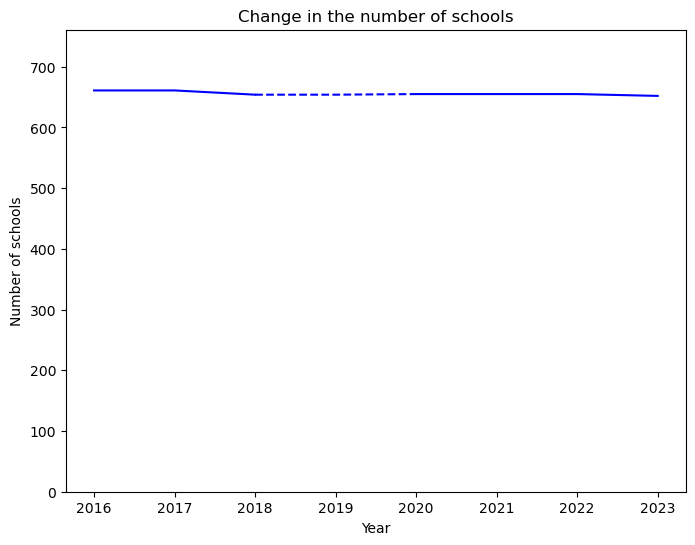

In [6]:
# check the changes of number of schools
n_schools = []
n_schools.append(scolaire1617.shape[0])
n_schools.append(scolaire1718.shape[0])
n_schools.append(scolaire1819.shape[0])
n_schools.append(scolaire1819.shape[0]) # miss data from 2019 !!!
n_schools.append(scolaire2021.shape[0])
n_schools.append(scolaire2122.shape[0])
n_schools.append(scolaire2223.shape[0])
n_schools.append(scolaire2324.shape[0])

df_schools = pd.DataFrame({
    #'year': ['2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024'],
    'year': ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    'school': n_schools
})

plt.figure(figsize=(8, 6))
# df_schools.loc[3, 'school'] = np.nan
plt.plot(df_schools['year'][:3], df_schools['school'][:3], linestyle='-', color='b')
plt.plot(df_schools['year'][2:5], df_schools['school'][2:5], linestyle='--', color='b')
plt.plot(df_schools['year'][4:], df_schools['school'][4:], linestyle='-', color='b')
plt.title('Change in the number of schools')
plt.xlabel('Year')
plt.ylabel('Number of schools')
plt.ylim(0, max(df_schools['school']) + 100)
plt.show()

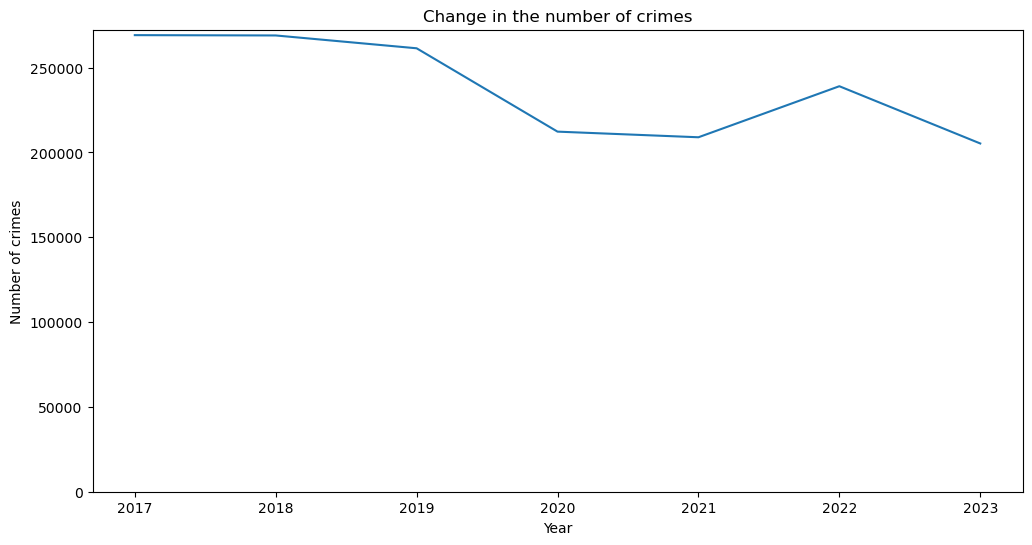

In [7]:
# check the changes of number of crimes
year_counts = df_crimes[df_crimes['Year']>2016]['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='line')
plt.title('Change in the number of crimes')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.ylim(0)
plt.show()

d:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


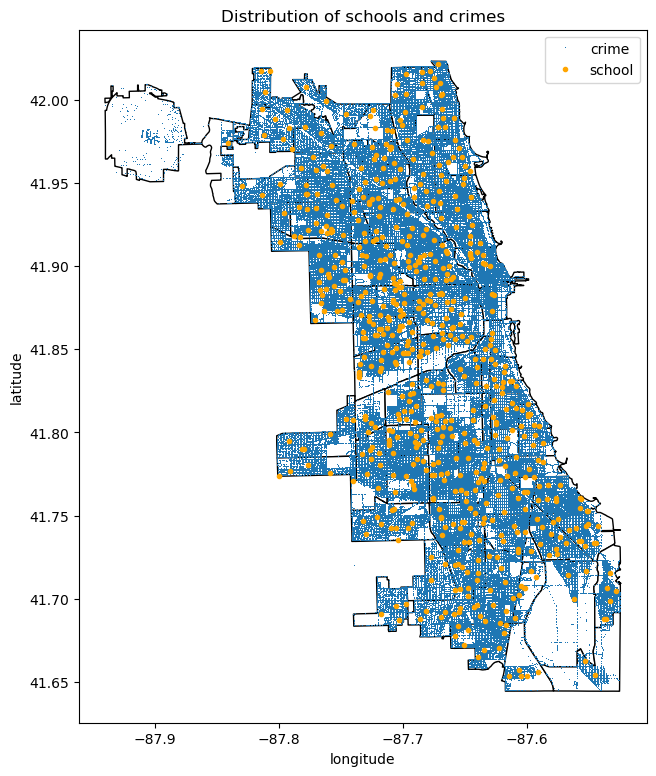

In [8]:
import geopandas
import geodatasets
import folium
from matplotlib.patches import Circle

### Visualize the distribution of crimes and schools
# Chicago map
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))
base = chicago.plot(color='white', edgecolor='black', figsize=(15, 9))

df_crimes.plot(x='Longitude', y='Latitude', ax=base, marker=',', linestyle='', label='crime')
scolaire2223.plot(x='School_Longitude', y='School_Latitude', ax=base, marker='.', linestyle='',color='orange', label='school')

plt.title('Distribution of schools and crimes')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


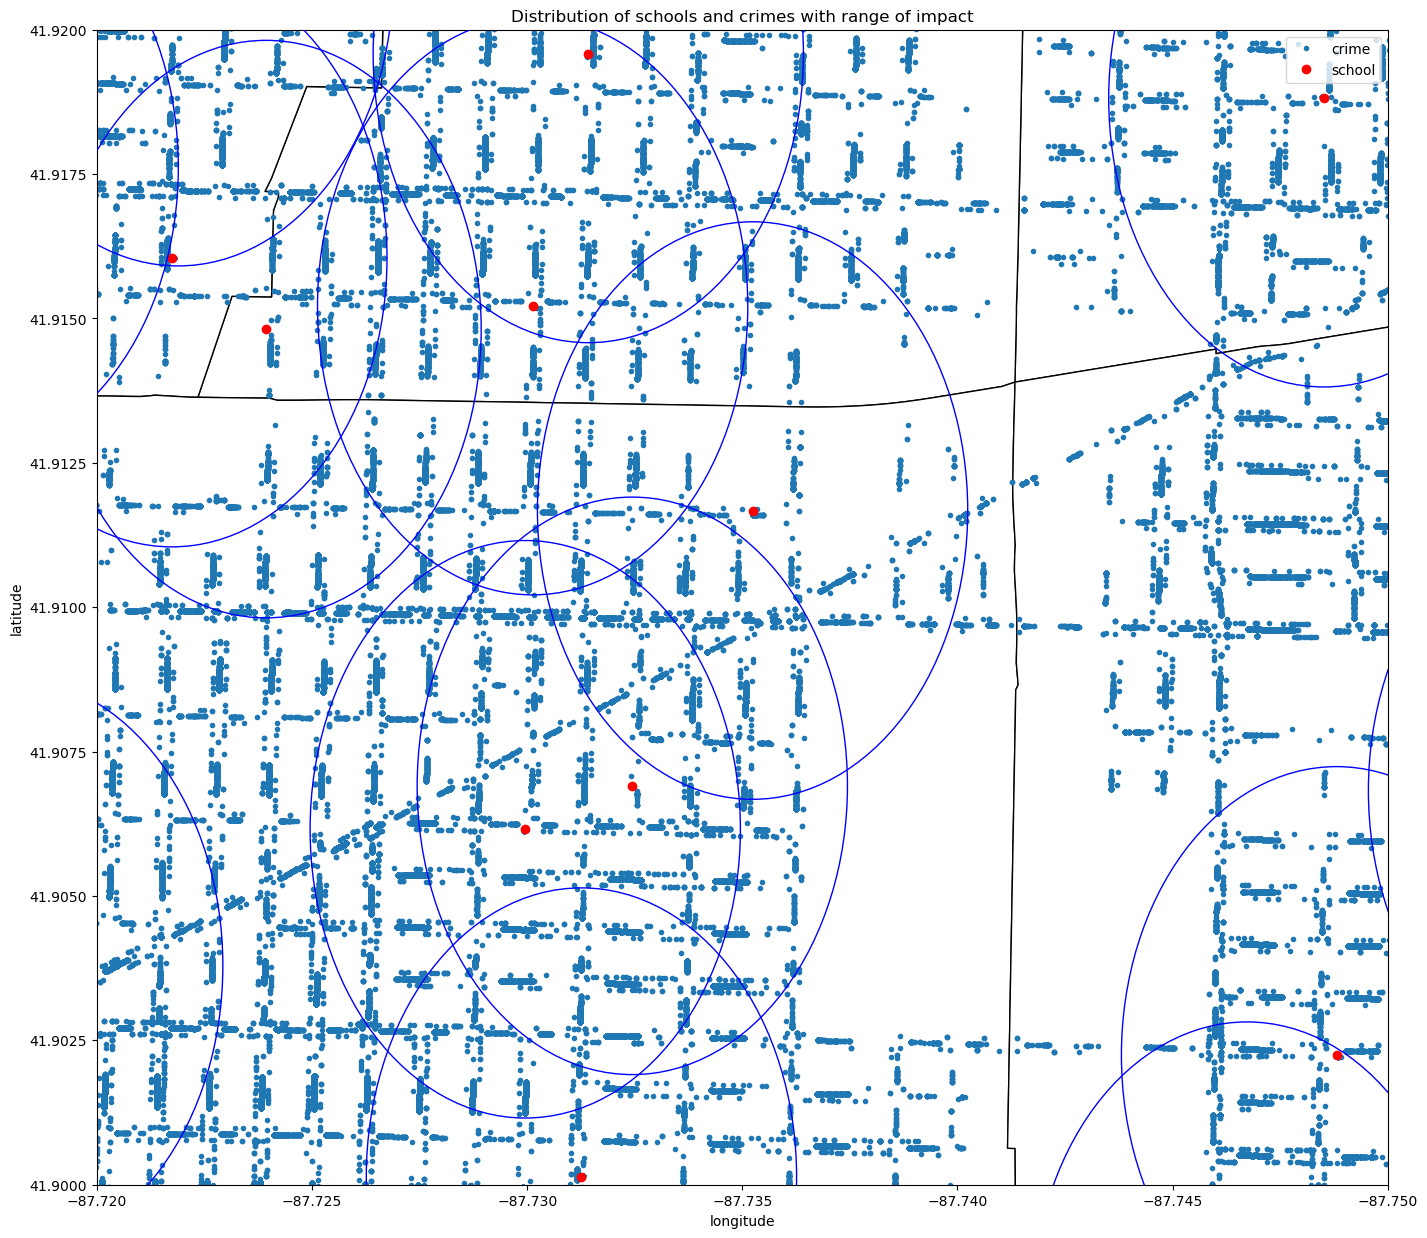

In [9]:
from matplotlib.patches import Circle

### Visualize the distribution of crimes and schools with range of impact
# Chicago map
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))
base = chicago.plot(color='white', edgecolor='black', figsize=(20, 15))

df_crimes.plot(x='Longitude', y='Latitude', ax=base, marker='.', linestyle='', label='crime')
scolaire2223.plot(x='School_Longitude', y='School_Latitude', ax=base, marker='o', linestyle='',color='r', label='school')

for i, school in scolaire2223.iterrows():
    circle = Circle((school['School_Longitude'], school['School_Latitude']), 0.005, color='b', fill=False, zorder=10,)
    base.add_patch(circle)


base.set_xlim([-87.72, -87.75]) 
base.set_ylim([41.9, 41.92]) 

plt.title('Distribution of schools and crimes with range of impact')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

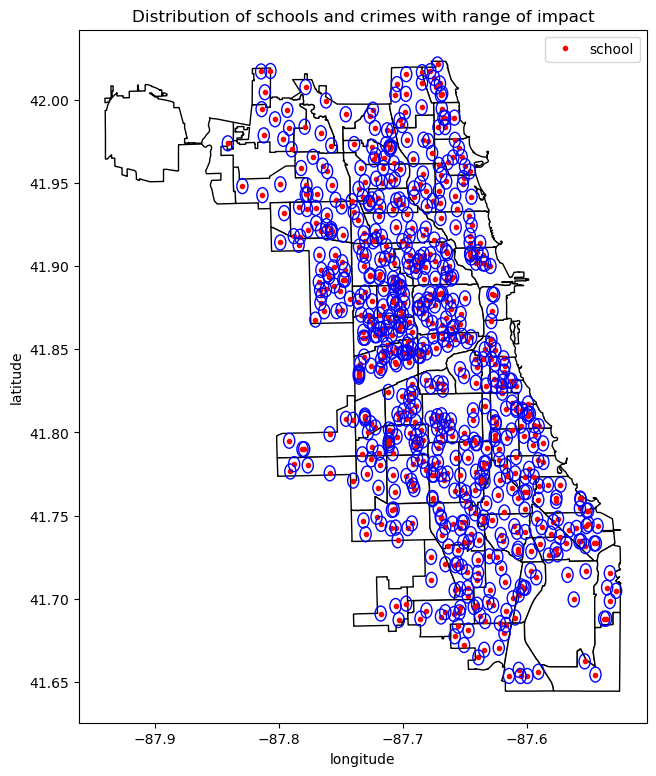

In [10]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))
base = chicago.plot(color='white', edgecolor='black', figsize=(15, 9))

scolaire1617.plot(x='School_Longitude', y='School_Latitude', ax=base, marker='.', linestyle='',color='r', label='school')

for i, school in scolaire1617.iterrows():
    circle = Circle((school['School_Longitude'], school['School_Latitude']), 0.0045, color='blue', fill=False, zorder=10,)
    base.add_patch(circle)

plt.title('Distribution of schools and crimes with range of impact')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

# Clean Data and fuse 2 datasets

In [11]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

# merge school data
scolaire1617['Year'] = 2016
scolaire1718['Year'] = 2017
scolaire1819['Year'] = 2018
scolaire2021['Year'] = 2020
scolaire2122['Year'] = 2021
scolaire2223['Year'] = 2022
scolaire2324['Year'] = 2023
Chicago_schools_2016_2023_ = pd.concat([scolaire1617, scolaire1718, scolaire1819, scolaire2021, scolaire2122, scolaire2223, scolaire2324], axis=0)

print(Chicago_schools_2016_2023_.shape)

(4593, 102)


In [12]:
## Créer une dataset pour écoles 2019
## on va supposer que les écoles en 2019 sont les mêmes écoles en 2018
scolaire1617['Year'] = 2019
Chicago_schools_2016_2023 = pd.concat([scolaire1617, Chicago_schools_2016_2023_], axis=0)

In [13]:
Chicago_schools_2016_2023.shape

(5254, 102)

In [14]:
# ### Find the community area of schools
# community_areas = gpd.read_file('Boundaries_-_Community_Areas_(current).geojson')

# # Convert school data to GeoDataFram 
# geometry = [Point(xy) for xy in zip(Chicago_schools_2016_2023['School_Longitude'], Chicago_schools_2016_2023['School_Latitude'])]
# crs = {'init': 'epsg:4326'}  # WGS84 coordinate reference system
# schools_geo = gpd.GeoDataFrame(Chicago_schools_2016_2023, crs=crs, geometry=geometry)

# area_number = gpd.sjoin(schools_geo, community_areas, how='left', op='within')

# Chicago_schools_2016_2023['area_numbe'] = area_number['area_numbe']


# # Check
# print(Chicago_schools_2016_2023.columns)

# # Create a new dataset
# #Chicago_schools_2016_2023.to_csv('Chicago_schools_2016_2023.csv')

In [15]:
scolaire1617['School_Latitude']

0      42.016892
1      41.753750
2      41.864365
3      41.874673
4      41.858372
         ...    
656    41.823900
657    41.981315
658    41.935726
659    41.946645
660    41.808200
Name: School_Latitude, Length: 661, dtype: float64

In [16]:
scolaire1617['School_Longitude']

0     -87.814195
1     -87.707345
2     -87.668722
3     -87.687842
4     -87.722386
         ...    
656   -87.692077
657   -87.708708
658   -87.718204
659   -87.691013
660   -87.730450
Name: School_Longitude, Length: 661, dtype: float64

In [17]:
# Definition of the circle radius
radius = 1000

Fuse 2 datasets and create new variables

In [18]:
from geopy.distance import geodesic
import geopandas as gpd
from shapely.geometry import Point

lst = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
lst_schools = []
 

### fuse datasets
for year in lst:
    '''
    Calculation of the number of crimes within a certain radius of each school in the same year
    Calculate the number of other school types within a certain radius of each school in the same year
    '''
    ### calculation of the number of crimes within a certain radius of each school in the same year
    print(year)
    df_crimes_year = df_crimes[df_crimes['Year']==year].dropna(subset=['Longitude'])
    df_schools = Chicago_schools_2016_2023[Chicago_schools_2016_2023['Year']==year]

    schools_geometry = [Point(xy) for xy in zip(df_schools['School_Longitude'], df_schools['School_Latitude'])]
    schools = gpd.GeoDataFrame(df_schools, geometry=schools_geometry)

    crimes_geometry = [Point(xy) for xy in zip(df_crimes_year['Longitude'], df_crimes_year['Latitude'])]
    crimes = gpd.GeoDataFrame(df_crimes_year, geometry=crimes_geometry)

    # use meter
    schools.crs = 'EPSG:4326'  # WGS84
    crimes.crs = 'EPSG:4326'  # WGS84
    schools = schools.to_crs(epsg=32633)  # UTM zone 33N
    crimes = crimes.to_crs(epsg=32633)  # UTM zone 33N

    crime_spatial_index = crimes.sindex
    school_spatial_index = schools.sindex

    if year < 2023:
        df_crimes_year_next = df_crimes[df_crimes['Year']==year+1].dropna(subset=['Longitude'])
        crimes_geometry_next = [Point(xy) for xy in zip(df_crimes_year_next['Longitude'], df_crimes_year_next['Latitude'])]
        crimes_next = gpd.GeoDataFrame(df_crimes_year_next, geometry=crimes_geometry_next)
        crimes_next.crs = 'EPSG:4326'  # WGS84
        crimes_next = crimes_next.to_crs(epsg=32633)  # UTM zone 33N
        crime_spatial_index_next = crimes_next.sindex

    # count crimes
    def count_crimes_around_school(school, crimes, radius=radius):
        possible_matches_index = list(crime_spatial_index.intersection(school.geometry.buffer(radius).bounds))
        possible_matches = crimes.iloc[possible_matches_index]
        return len(possible_matches)
    
    # count crimes of next year
    def count_crimes_around_school_next(school, crimes, radius=radius):
        possible_matches_index = list(crime_spatial_index_next.intersection(school.geometry.buffer(radius).bounds))
        possible_matches = crimes.iloc[possible_matches_index]
        return len(possible_matches)

    schools['Crime_Count'] = schools.apply(lambda x: count_crimes_around_school(x, crimes), axis=1)

    # calculer le crime_count pour l'année prochaine
    if year < 2023:
        schools['Crime_Count_Next_Year'] = schools.apply(lambda x: count_crimes_around_school_next(x, crimes_next), axis=1)
    
    # count schools
    def count_school_types_around_school(school, schools, radius=radius):
        # Get other schools within the specified radius
        possible_matches_index = list(school_spatial_index.intersection(school.geometry.buffer(radius).bounds))
        if not possible_matches_index:
            return pd.Series({'Is_High_School': 0, 'Is_Middle_School': 0, 'Is_Elementary_School': 0, 'Is_Pre_School': 0})
        
        possible_matches = schools.iloc[possible_matches_index]
        # Count the occurrences of school types
        school_types_counts = possible_matches[
            ['Is_High_School', 'Is_Middle_School', 'Is_Elementary_School', 'Is_Pre_School']
        ].replace({'Y': 1, 'N': 0}).sum()
        return school_types_counts

    # Count the occurrences of other school types within the school's radius
    schools_types_counts = schools.apply(lambda x: count_school_types_around_school(x, schools), axis=1)

    # Add the counts to the original GeoDataFrame
    schools['Count_High_School_Near'] = schools_types_counts['Is_High_School']
    schools['Count_Middle_School_Near'] = schools_types_counts['Is_Middle_School']
    schools['Count_Elementary_School_Near'] = schools_types_counts['Is_Elementary_School']
    schools['Count_Pre_School_Near'] = schools_types_counts['Is_Pre_School']

    lst_schools.append(schools)

2016
[200, 0]
[1, 405]
[398, 491, 2, 617, 522]
[630, 433, 606, 411, 3]
[21, 432, 408, 31, 4, 69, 419]
[406, 501, 5, 226]
[69, 419, 6]
[401, 449, 7, 155, 80]
[8, 509]
[102, 284, 9, 584]
[234, 602, 10, 20]
[514, 159, 11]
[12, 293, 393]
[45, 327, 13, 275, 338]
[14, 454, 326, 213]
[15]
[521, 154, 16, 583]
[17, 290, 337, 429]
[99, 18, 400, 209]
[378, 19, 498, 336]
[10, 20, 574]
[540, 533, 21, 432, 408, 31, 4]
[564, 220, 22, 401, 449, 155, 80]
[23]
[24, 628, 541]
[625, 25]
[494, 153, 26, 394]
[577, 193, 27, 596]
[530, 28]
[29, 483]
[30, 310, 586]
[21, 432, 408, 31, 4]
[32, 647, 394]
[33, 49, 294]
[34]
[35, 77]
[36, 131, 257]
[110, 37, 344]
[141, 372, 73, 38, 630, 433, 411]
[655, 39]
[454, 326, 213, 210, 40, 347, 476]
[422, 41, 120, 212, 170, 194]
[280, 332, 42, 659]
[74, 434, 512, 116, 224, 43, 286, 355]
[186, 44]
[45, 327, 13]
[362, 191, 582, 46, 389, 406]
[307, 47]
[302, 618, 48, 267]
[146, 33, 49, 294]
[497, 430, 50]
[532, 86, 51]
[52, 63]
[386, 334, 53, 196, 491]
[386, 54, 589, 398]
[80,

In [19]:
lst_schools[5]['Crime_Count']

0      1062
1       691
2      1281
3      2207
4       442
       ... 
650    1452
651     193
652     390
653     747
654     533
Name: Crime_Count, Length: 655, dtype: int64

In [20]:
lst_schools[1]

School_ID Legacy_Unit_ID Finance_ID                     Short_Name  \
0     610,521          7,000      29391                        DAVIS M   
1     609,750          1,750      49051                     SIMPSON HS   
2     610,386          1,123      67021         PEACE AND EDUCATION HS   
3     400,123          9,040      66106  YCCS - SCHOLASTIC ACHIEVEMENT   
4     400,116          9,033      66591           MONTESSORI ENGLEWOOD   
..        ...            ...        ...                            ...   
656   610,030          4,390      31151                      KOZMINSKI   
657   610,197          6,140      25581                        TALCOTT   
658   610,084          4,960      29211                         KELLER   
659   609,711          1,360      46151                      HARPER HS   
660   610,029          4,380      24101                         LOZANO   

                                           Long_Name School_Type  \
0          Sir Miles Davis Magnet Elementary Academy         NaN   
1                 Simpson Academy HS for Young Women         NaN   
2                     Peace & Education Coalition HS         NaN   
3         YCCS- Academy of Scholastic Achievement HS         NaN   
4         The Montessori School of Englewood Charter         NaN   
..                                               ...         ...   
656   Charles Kozminski Elementary Community Academy         NaN   
657                 Mancel Talcott Elementary School         NaN   
658              Annie Keller Regional Gifted Center         NaN   
659                William Rainey Harper High School         NaN   
660  Rodolfo Lozano Bilingual & International Ctr ES         NaN   

    Primary_Category Is_High_School Is_Middle_School Is_Elementary_School  \
0                 ES              N                Y                    Y   
1                 HS              Y                Y                    Y   
2                 HS              Y                N                    N   
3                 HS              Y                N                    N   
4                 ES              N                Y                    Y   
..               ...            ...              ...                  ...   
656               ES              N                Y                    Y   
657               ES              N                Y                    Y   
658               ES              N                Y                    Y   
659               HS              Y                N                    N   
660               ES              N                Y                    Y   

     ... multiSensory SignificantlyModifiedMOD transition  \
0    ...          NaN                      NaN        NaN   
1    ...          NaN                      NaN        NaN   
2    ...          NaN                      NaN        NaN   
3    ...          NaN                      NaN        NaN   
4    ...          NaN                      NaN        NaN   
..   ...          ...                      ...        ...   
656  ...          NaN                      NaN        NaN   
657  ...          NaN                      NaN        NaN   
658  ...          NaN                      NaN        NaN   
659  ...          NaN                      NaN        NaN   
660  ...          NaN                      NaN        NaN   

                              geometry Crime_Count Crime_Count_Next_Year  \
0    POINT (-5394164.566 11532074.709)        1993                  2031   
1    POINT (-5379823.426 11527539.629)         668                   767   
2    POINT (-5389186.574 11530510.860)        1548                  1425   
3    POINT (-5374528.055 11535146.384)        3021                  2888   
4    POINT (-5393280.741 11533004.840)        1652                  1597   
..                                 ...         ...                   ...   
656  POINT (-5392521.965 11523355.979)         741                   950   
657  POINT (-5375344.010 1152667

In [21]:
lst_schools[0]['Dress_Code']

0      N
1      Y
2      N
3      Y
4      Y
      ..
656    Y
657    N
658    Y
659    Y
660    Y
Name: Dress_Code, Length: 661, dtype: object

In [22]:
lst_schools[1]['School_ID']

0      610,521
1      609,750
2      610,386
3      400,123
4      400,116
        ...   
656    610,030
657    610,197
658    610,084
659    609,711
660    610,029
Name: School_ID, Length: 661, dtype: object

In [23]:
# pour unifier la forme de school_ID dans différentes années et enlever la virgule
lst_schools[1]['School_ID'] = lst_schools[1]['School_ID'].str.replace(',', '').astype(int)
lst_schools[2]['School_ID'] = lst_schools[2]['School_ID'].str.replace(',', '').astype(int)

In [24]:
# Création des bases school2016 avec les crimes rates des années suivantes

School_data2016 = (lst_schools[0]).drop('Crime_Count', axis=1)
columns = ['Crime_Count', 'School_ID']

#School2017 = lst_schools[1][columns]
# concaténer school 2016 avec crime_count de2017
#df1 = pd.merge(School_data2016, School2017, on='School_ID', how='outer')
#df1.dropna(subset=['Short_Name'], inplace=True)

school_crime_data = {}
for i in range(1, 8):
    # Obtenez le dataframe de l'indice i avec les colonnes nécessaires
    crime_i = lst_schools[i][columns]

    # Concaténez School_data2016 avec le dataframe actuel
    school_key = f'df{i}'  # Le nom de la clé dans le dictionnaire
    school_crime_data[school_key] = pd.merge(School_data2016, crime_i, on='School_ID', how='outer')
    school_crime_data[school_key].dropna(subset=['Short_Name'], inplace=True)

In [25]:
lst_schools[3][columns]

Crime_Count School_ID
0             76    610163
1            398    610558
2            620    609750
3           1587    610571
4           2711    610123
..           ...       ...
656          607    610317
657          445    609749
658         1134    400172
659          352    609720
660          433    400080

[661 rows x 2 columns]

In [26]:
# database1 correspond à school2016_Crime2017 ..... database6 correspond à school2016_Crime2022 et database7 correspond à school2016_Crime2023

In [27]:
lst_schools[1]['Crime_Count']

0      1993
1       668
2      1548
3      3021
4      1652
       ... 
656     741
657     895
658     157
659    2182
660    1276
Name: Crime_Count, Length: 661, dtype: int64

In [28]:
school_crime_data['df7']  # 2019

School_ID Legacy_Unit_ID Finance_ID                      Short_Name  \
0      610163           5770      30081                           STOCK   
1      610558           9598      46611                        GOODE HS   
2      609750           1750      49051                      SIMPSON HS   
3      610571           9636      65015             OMBUDSMAN - WEST HS   
4      610123           5370      24911                            PENN   
..        ...            ...        ...                             ...   
656    610317           7470      26451                   BRIGHTON PARK   
657    609749           1740      46061               NORTHSIDE PREP HS   
658    400172           9647      66255  ASPIRA - BUSINESS & FINANCE HS   
659    609720           1440      46221                    LANE TECH HS   
660    400080           3345      66396                  ACERO - TORRES   

                                      Long_Name           School_Type  \
0             Frederick Stock Elementary School          Neighborhood   
1                   Sarah E. Goode STEM Academy       Citywide-Option   
2            Simpson Academy HS for Young Women       Citywide-Option   
3                       Ombudsman Chicago- West       Citywide-Option   
4                William Penn Elementary School          Neighborhood   
..                                          ...                   ...   
656             Brighton Park Elementary School          Neighborhood   
657   Northside College Preparatory High School  Selective enrollment   
658                 ASPIRA Business and Finance               Charter   
659         Albert G Lane Technical High School  Selective enrollment   
660  Acero Charter Schools - PFC Omar E. Torres               Charter   

    Primary_Category Is_High_School Is_Middle_School Is_Elementary_School  \
0                 ES              N                N                    N   
1                 HS              Y                N                    N   
2                 HS              Y                Y                    Y   
3                 HS              Y                N                    N   
4                 ES              N                Y                    Y   
..               ...            ...              ...                  ...   
656               ES              N                Y                    Y   
657               HS              Y                N                    N   
658               HS              Y                N                    N   
659               HS              Y                Y                    N   
660               ES              N                Y                    Y   

     ... multiSensory SignificantlyModifiedMOD transition  \
0    ...          NaN                      NaN        NaN   
1    ...          NaN                      NaN        NaN   
2    ...          NaN                      NaN        NaN   
3    ...          NaN                      NaN        NaN   
4    ...          NaN                      NaN        NaN   
..   ...          ...                      ...        ...   
656  ...          NaN                      NaN        NaN   
657  ...          NaN                      NaN        NaN   
658  ...          NaN                      NaN        NaN   
659  ...          NaN                      NaN        NaN   
660  ...          NaN                      NaN        NaN   

                              geometry Crime_Count_Next_Year  \
0    POINT (-5350956.717 11536273.469)                  69.0   
1    POINT (-5395265.042 11537655.528)                 405.0   
2    POINT (-5379823.426 11527539.629)                 668.0   
3    POINT (-5377513.541 11529195.959)                1479.0   
4    POINT (-5378677.600 11533981.781)                2573.0   
..                                 ...                   ...   
656  POINT (-5385116.306 11532290.348)                 646.0   
657  POINT (-5360424.938 11526105.536)                 5

Create new dataset

In [29]:
Chicago_schools_crimes_2016_2023 = pd.concat(lst_schools, axis=0)

# calculate ratio of crime
Chicago_schools_crimes_2016_2023['Ratio_Crimes'] = (((Chicago_schools_crimes_2016_2023['Crime_Count_Next_Year']-Chicago_schools_crimes_2016_2023['Crime_Count'])/Chicago_schools_crimes_2016_2023['Crime_Count'])*100).round(2) # by percent !

# delete 2023 (we are keeping it for prediction)
# Chicago_schools_crimes_2016_2023 = Chicago_schools_crimes_2016_2023[Chicago_schools_crimes_2016_2023['Year'] != 2023]

Chicago_schools_crimes_2016_2023.to_csv('Chicago_schools_crimes_2016_2023_500.csv', index=False, mode='w')

Show new dataset

In [30]:
df = pd.read_csv('Chicago_schools_crimes_2016_2023_500.csv')
for i in df.columns:
    print(i)

School_ID
Legacy_Unit_ID
Finance_ID
Short_Name
Long_Name
School_Type
Primary_Category
Is_High_School
Is_Middle_School
Is_Elementary_School
Is_Pre_School
Summary
Administrator_Title
Administrator
Secondary_Contact_Title
Secondary_Contact
Address
City
State
Zip
Phone
Fax
CPS_School_Profile
Website
Facebook
Twitter
Youtube
Pinterest
Attendance_Boundaries
Grades_Offered_All
Grades_Offered
Student_Count_Total
Student_Count_Low_Income
Student_Count_Special_Ed
Student_Count_English_Learners
Student_Count_Black
Student_Count_Hispanic
Student_Count_White
Student_Count_Asian
Student_Count_Native_American
Student_Count_Other_Ethnicity
Student_Count_Asian_Pacific_Islander
Student_Count_Multi
Student_Count_Hawaiian_Pacific_Islander
Student_Count_Ethnicity_Not_Available
Statistics_Description
Demographic_Description
ADA_Accessible
Dress_Code
PreK_School_Day
Kindergarten_School_Day
School_Hours
Freshman_Start_End_Time
After_School_Hours
Earliest_Drop_Off_Time
Classroom_Languages
Bilingual_Services
Re

# Choose and convert variables

In [31]:
columns_lst = ['Is_High_School', 'Is_Middle_School', 'Is_Elementary_School', 'Is_Pre_School', 'After_School_Hours', 'School_Hours', 'Dress_Code', 'Student_Count_Total', 'Count_High_School_Near', 'Count_Middle_School_Near', 'Count_Elementary_School_Near', 'Count_Pre_School_Near','Crime_Count']

for i in range(1,8) : 
    school_crime_data[f'df{i}'] = school_crime_data[f'df{i}'][columns_lst]

school_crime_data['df1']

Is_High_School Is_Middle_School Is_Elementary_School Is_Pre_School  \
0                N                N                    N             Y   
1                Y                N                    N             N   
2                Y                Y                    Y             N   
3                Y                N                    N             N   
4                N                Y                    Y             Y   
..             ...              ...                  ...           ...   
656              N                Y                    Y             Y   
657              Y                N                    N             N   
658              Y                N                    N             N   
659              Y                Y                    N             N   
660              N                Y                    Y             N   

    After_School_Hours         School_Hours Dress_Code Student_Count_Total  \
0                  NaN      9:00 AM-3:00 PM          N                 232   
1      3:00pm - 5:00pm  7:30  AM - 2:45  PM          Y                 900   
2                  NaN  8:00  AM - 3:05  PM          N                  38   
3                  NaN    7:30 AM - 4:00 PM          Y                 341   
4                  NaN      7:30 AM-3:30 PM          Y                 311   
..                 ...                  ...        ...                 ...   
656  3:00 pm - 5:30 pm      8:00 AM-3:00 PM          Y                 454   
657                NaN      8:00 AM-3:15 PM          N               1,062   
658                NaN        8:00AM-4:00PM          Y                 494   
659                NaN  8:00  AM - 3:15  PM          Y               4,447   
660    3:00 pm-4:00 pm      8:00 AM-3:30 PM          Y                 564   

     Count_High_School_Near  Count_Middle_School_Near  \
0                       1.0                       0.0   
1                       1.0                       1.0   
2                       3.0                       3.0   
3                       3.0                       1.0   
4                       0.0                       7.0   
..                      ...                       ...   
656                     1.0                       3.0   
657                     1.0                       1.0   
658                     3.0                       3.0   
659                     2.0                       2.0   
660                     1.0                       3.0   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  
0                             0.0                    1.0         69.0  
1                             1.0                    0.0        405.0  
2                             3.0                    0.0        668.0  
3                             2.0                    1.0       1479.0  
4                             7.0                    4.0       2573.0  
..                            ...                    ...          ...  
656                           3.0                    2.0        646.0  
657                           1.0                    1.0        502.0  
658                           3.0                    3.0       1342.0  
659                           1.0                    0.0        452.0  
660                           3.0                    1.0        424.0  

[661 rows x 13 columns]

In [32]:
for i in school_crime_data['df4']['After_School_Hours']:
    print(i)

nan
3:00pm - 5:00pm
nan
nan
nan
nan
nan
nan
2:45 pm - 5:15 pm
3:00 PM- 5:15 PM
nan
3:15 PM - 7:00 PM
3:00PM - 6:00PM
4:35PM - 6:30PM
nan
nan
nan
nan
3:00-6:00pm
3:30-5:00 pm
3:30 PM - 6:00 PM
nan
4:00 pm - 7:00 pm
nan
nan
nan
4:30 PM
2:45pm - 5:00pm
nan
nan
3:30 PM - 5:00 PM
nan
nan
4:00-5:30pm
nan
3:30 PM - 5:15 PM
nan
4:30PM-6:30PM
4:00 PM-6:00PM
2:45 - 8:00 PM
3:30pm-5:45 pm
3:30 p.m. - 6:00 p.m.
3:15 PM - 4:00 PM
4:00 PM - 6:00 PM
nan
3:30 pm-6:00 pm
nan
nan
2:40 to 8:00 P.M.
nan
nan
nan
Mon, Tues, and Thurs 3:15 PM - 4:15 PM
nan
nan
3:00 p.m. to 5:30 p.m.
nan
nan
nan
3:45 p.m.-6:00 p.m.
3:30 - 5:00
nan
3:00PM-6:00PM
nan
3:00PM - 4:30PM
nan
Mon - Thur 4PM - 6PM
nan
3:23-6:00
nan
2:45 PM-3:45 PM
4:00 PM-5:00 PM
3:00 PM - 7:00 PM
nan
nan
nan
3:45-5:15 PM
nan
2:30 PM - 4:45 PM
nan
nan
nan
3:45 - 5:00pm
3:30 pm - 6:30 pm
4:00 pm-6:00 pm
nan
nan
nan
nan
nan
nan
nan
3:30pm-6:00pm
6:00 PM
3:00 PM -4:45 PM
6:00pm (YMCA Program beginning October, 2015)
3:45-6:00
nan
nan
4:15 - 6:30
3:05 PM 

# Convert text to numeric
### after school time and school time are both texts !

In [33]:
import re

### clean data
def time_to_minutes_after_school(time_str):
    '''
    function used to after school hour from time text in dataset
    return minutes
    '''
    if not isinstance(time_str, str):
        return 0  # Return 0 for non-string or unexpected values
    if 'none' in time_str.lower() or 'no time' in time_str.lower():
        return 0
    # regex that matches time text
    time_pattern = r'(\d{1,2}:\d{1,2})?\s*([apAPM]+)?\s*-\s*(\d{1,2}:\d{1,2})?\s*([apAPM]+)?'
    match = re.match(time_pattern, time_str)
    if match:
        start_time, start_period, end_time, end_period = match.groups()
        # some time text doesn't have end time
        if start_time and not end_time:
            end_time = '18:00'
            end_period = start_period
        # some time text doesn't have end time period
        if start_period and not end_period:
            end_period = start_period
        start_time = start_time.replace(' ', '').replace('.', '')
        end_time = end_time.replace(' ', '').replace('.', '')
        start_time = start_time.split(':') if ':' in start_time else ['15', '00']
        end_time = end_time.split(':') if ':' in end_time else ['18', '00']
        start_hour, start_minute = map(int, start_time)
        # calculate duration time
        if start_period and start_period.lower() == 'pm' and start_hour != 12:
            start_hour += 12
        end_hour, end_minute = map(int, end_time)
        if end_period and end_period.lower() == 'pm' and end_hour != 12:
            end_hour += 12
        total_minutes = (end_hour - start_hour) * 60 + (end_minute - start_minute)
        return total_minutes if 400 >= total_minutes >= 0 else 0
    else:
        return 0
    
def time_to_minutes_school(time_str):
    '''
    function used to school hour from time text in dataset
    return minutes
    '''
    if not isinstance(time_str, str):
        return 8*60 # the default is 8h per day
    if 'none' in time_str.lower() or 'no time' in time_str.lower():
        return 8*60
    # regex that matches time text
    time_pattern = r'(\d{1,2}:\d{1,2})?\s*([apAPM]+)?\s*-\s*(\d{1,2}:\d{1,2})?\s*([apAPM]+)?'
    match = re.match(time_pattern, time_str)
    if match:
        start_time, start_period, end_time, end_period = match.groups()
        # handling different time formats
        if not start_time:
            start_time = '8:00'
        if not end_time:
            end_time = '16:00'
        start_time = start_time.replace(' ', '').replace('.', '')
        end_time = end_time.replace(' ', '').replace('.', '')
        start_time = start_time.split(':') if ':' in start_time else ['8', '00']
        end_time = end_time.split(':') if ':' in end_time else ['16', '00']
        start_hour, start_minute = map(int, start_time)
        # calculate duration time
        if start_period and start_period.lower() == 'pm' and start_hour != 12:
            start_hour += 12
        end_hour, end_minute = map(int, end_time)
        if end_period and end_period.lower() == 'pm' and end_hour != 12:
            end_hour += 12
        total_minutes = (end_hour - start_hour) * 60 + (end_minute - start_minute)
        return total_minutes if total_minutes >= 0 else 8*60
    else:
        return 8*60

# faire une boucle sur toutes les databases
for i in range(1, 8):
    current_df = school_crime_data[f'df{i}']
    current_df['After_School_Hours'] = current_df['After_School_Hours'].apply(time_to_minutes_after_school)
    current_df['School_Hours'] = current_df['School_Hours'].apply(time_to_minutes_school)

C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2877820803.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['After_School_Hours'] = current_df['After_School_Hours'].apply(time_to_minutes_after_school)
C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2877820803.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['School_Hours'] = current_df['School_Hours'].apply(time_to_minutes_school)


In [34]:
# text to numerical conversion
for i in range(1, 8):
    current_df = school_crime_data[f'df{i}']
    
    # Text to numerical conversion
    current_df = current_df.replace({'Y': 1, 'N': 0, 'True': 1, 'False': 0})
    current_df['Student_Count_Total'] = current_df['Student_Count_Total'].str.replace(',', '').astype(int)
    
    # Update the dataframe in the dictionary
    school_crime_data[f'df{i}'] = current_df

In [35]:
school_crime_data['df3']['Crime_Count']

0        76
1       398
2       620
3      1587
4      2711
       ... 
656     607
657     445
658    1134
659     352
660     433
Name: Crime_Count, Length: 661, dtype: int64

In [36]:
for i in range(1, 8):
    current_df = school_crime_data[f'df{i}']
    
    # Nettoyage des données manquantes dans 'Crime_Count'
    current_df['Crime_Count'] = pd.to_numeric(current_df['Crime_Count'], errors='coerce')
    current_df = current_df.dropna(subset=['Crime_Count'])
    
    # Calcul des percentiles
    q25 = np.percentile(current_df['Crime_Count'], 25)
    q75 = np.percentile(current_df['Crime_Count'], 75)
    
    # Création de la colonne 'Crime_level' avec la suppression des doublons
    current_df['Crime_level'] = pd.cut(current_df['Crime_Count'], bins=[-float('inf'), q25, q75, float('inf')], labels=[0, 1, 2], duplicates='drop')
    
    # Mise à jour du dataframe dans le dictionnaire
    school_crime_data[f'df{i}'] = current_df

C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\3974914233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['Crime_level'] = pd.cut(current_df['Crime_Count'], bins=[-float('inf'), q25, q75, float('inf')], labels=[0, 1, 2], duplicates='drop')
C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\3974914233.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['Crime_level'] = pd.cut(current_df['Crime_Count'], bins=[-float('inf'), q25, q75, float('inf')], labels=[0, 1, 2], duplicates='d

In [37]:
school_crime_data['df3']

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0                 0                 0                     0              1   
1                 1                 0                     0              0   
2                 1                 1                     1              0   
3                 1                 0                     0              0   
4                 0                 1                     1              1   
..              ...               ...                   ...            ...   
656               0                 1                     1              1   
657               1                 0                     0              0   
658               1                 0                     0              0   
659               1                 1                     0              0   
660               0                 1                     1              0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                     0           360           0                  232   
1                     0           435           1                  900   
2                     0           425           0                   38   
3                     0           510           1                  341   
4                     0           480           1                  311   
..                  ...           ...         ...                  ...   
656                   0           420           1                  454   
657                   0           435           0                 1062   
658                   0           480           1                  494   
659                   0           435           1                 4447   
660                   0           450           1                  564   

     Count_High_School_Near  Count_Middle_School_Near  \
0                         1                         0   
1                         1                         1   
2                         3                         3   
3                         3                         1   
4                         0                         7   
..                      ...                       ...   
656                       1                         3   
657                       1                         1   
658                       3                         3   
659                       2                         2   
660                       1                         3   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  \
0                               0                      1           76   
1                               1                      0          398   
2                               3                      0          620   
3                               2                      1         1587   
4                               7                      4         2711   
..                            ...                    ...          ...   
656                             3                      2          607   
657                             1                      1          445   
658                             3                      3         1134   
659                             1                      0          352   
660                             3                      1          433   

    Crime_level  
0             0  
1             0  
2             1  
3             2  
4             2  
..          ...  
656           0  
657           0  
658           1  
659           0  
660           0  

[661 rows x 14 columns]

### Data analysis

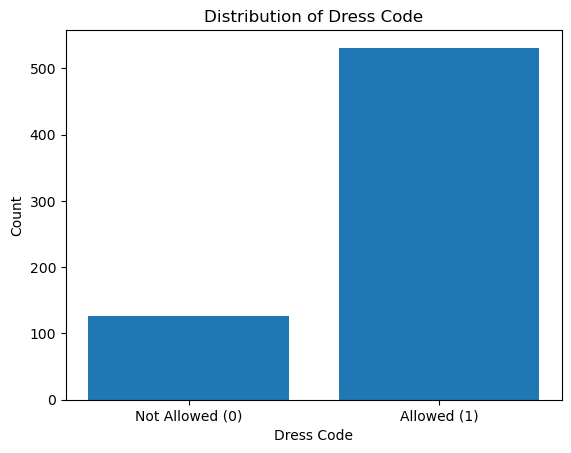

In [38]:
# Dress_Code
dress_code_counts = school_crime_data['df1']['Dress_Code'].value_counts()
plt.bar(dress_code_counts.index, dress_code_counts.values)
plt.xlabel('Dress Code')
plt.ylabel('Count')
plt.title('Distribution of Dress Code')
plt.xticks([0, 1], ['Not Allowed (0)', 'Allowed (1)'])
plt.show()

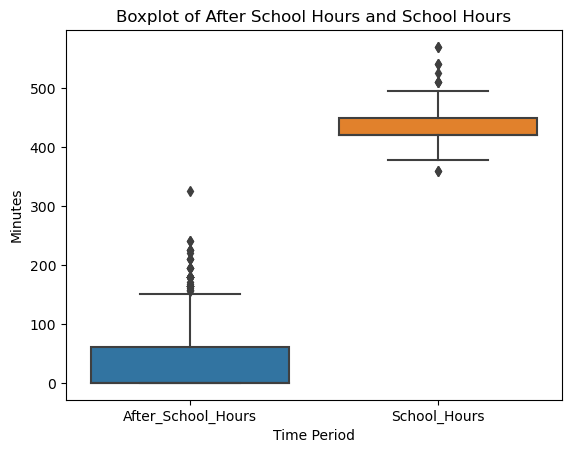

In [39]:
# After school hour and School hour
import seaborn as sns
sns.boxplot(data=school_crime_data[f'df{i}'][['After_School_Hours', 'School_Hours']])
plt.title('Boxplot of After School Hours and School Hours')
plt.xlabel('Time Period')
plt.ylabel('Minutes')
plt.show()

In [40]:
# Découverte des décomptes, moyennes et variances : 
dataaa = school_crime_data[f'df{i}'].drop(['Is_High_School', 'Is_Middle_School', 'Is_Elementary_School', 'Is_Pre_School'], axis=1)
dataaa.describe()

After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
count          641.000000    641.000000  641.000000           641.000000   
mean            32.375975    436.686427    0.814353           569.366615   
std             59.842507     27.602535    0.389126           399.804622   
min              0.000000    360.000000    0.000000             4.000000   
25%              0.000000    420.000000    1.000000           318.000000   
50%              0.000000    420.000000    1.000000           474.000000   
75%             60.000000    450.000000    1.000000           716.000000   
max            325.000000    570.000000    1.000000          4447.000000   

       Count_High_School_Near  Count_Middle_School_Near  \
count              641.000000                641.000000   
mean                 1.087363                  2.313573   
std                  1.048144                  1.324040   
min                  0.000000                  0.000000   
25%                  0.000000                  1.000000   
50%                  1.000000                  2.000000   
75%                  2.000000                  3.000000   
max                  5.000000                  7.000000   

       Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  
count                    641.000000             641.000000   641.000000  
mean                       2.475819               1.773791   869.664587  
std                        1.399707               1.132061   501.701952  
min                        0.000000               0.000000    44.000000  
25%                        1.000000               1.000000   533.000000  
50%                        2.000000               2.000000   810.000000  
75%                        3.000000               2.000000  1162.000000  
max                        8.000000               7.000000  4717.000000

In [41]:
school_crime_data[f'df{i}'].dtypes

Is_High_School                     int64
Is_Middle_School                   int64
Is_Elementary_School               int64
Is_Pre_School                      int64
After_School_Hours                 int64
School_Hours                       int64
Dress_Code                         int64
Student_Count_Total                int32
Count_High_School_Near           float64
Count_Middle_School_Near         float64
Count_Elementary_School_Near     float64
Count_Pre_School_Near            float64
Crime_Count                      float64
Crime_level                     category
dtype: object

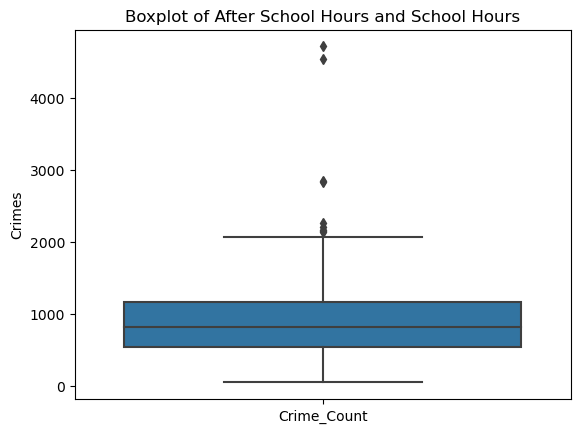

In [42]:
# crime count
import seaborn as sns
sns.boxplot(data=school_crime_data[f'df{i}'][['Crime_Count']])
plt.title('Boxplot of After School Hours and School Hours')
plt.ylabel('Crimes')
plt.show()

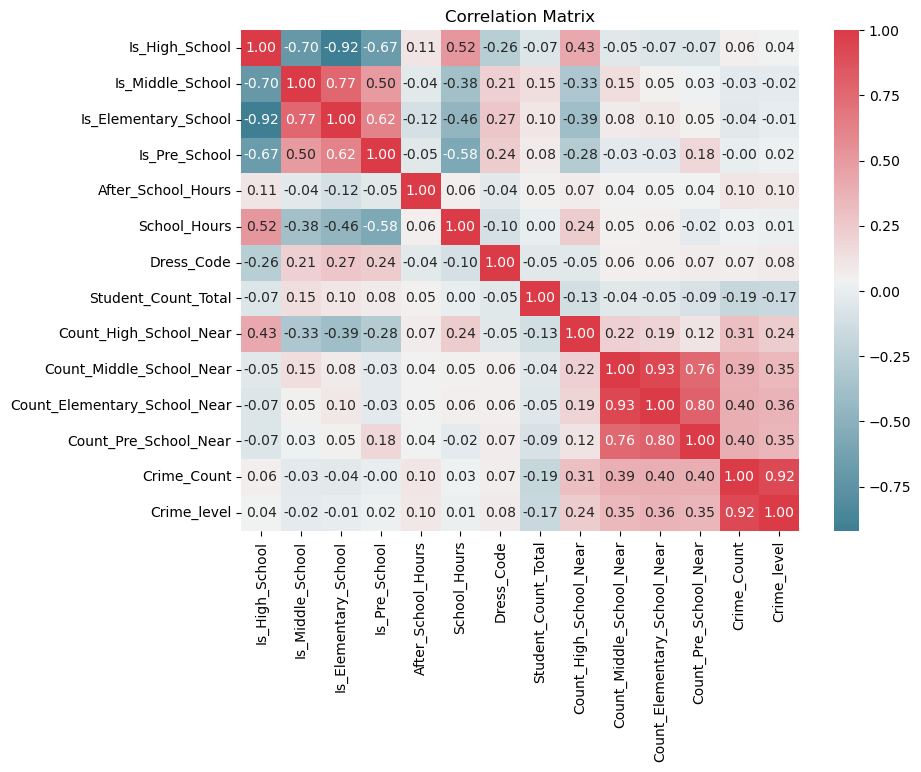

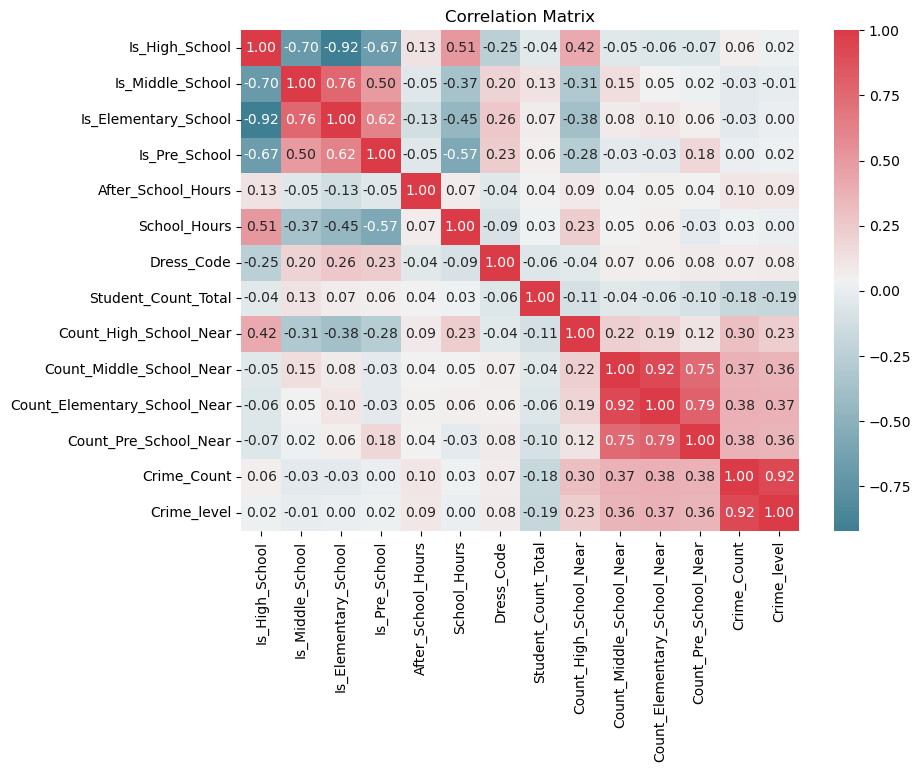

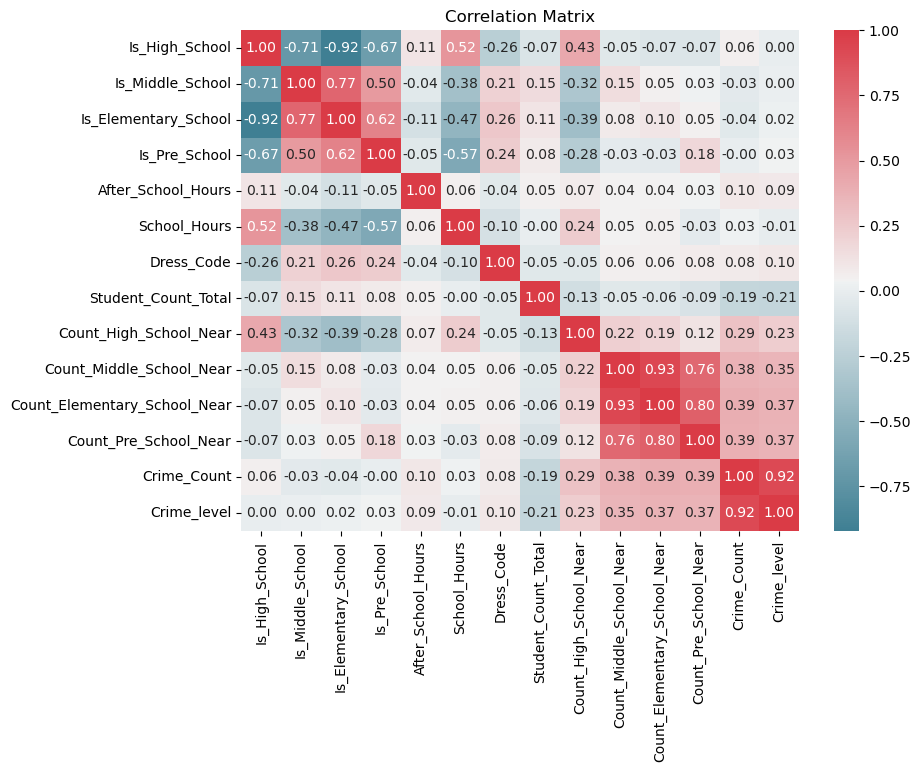

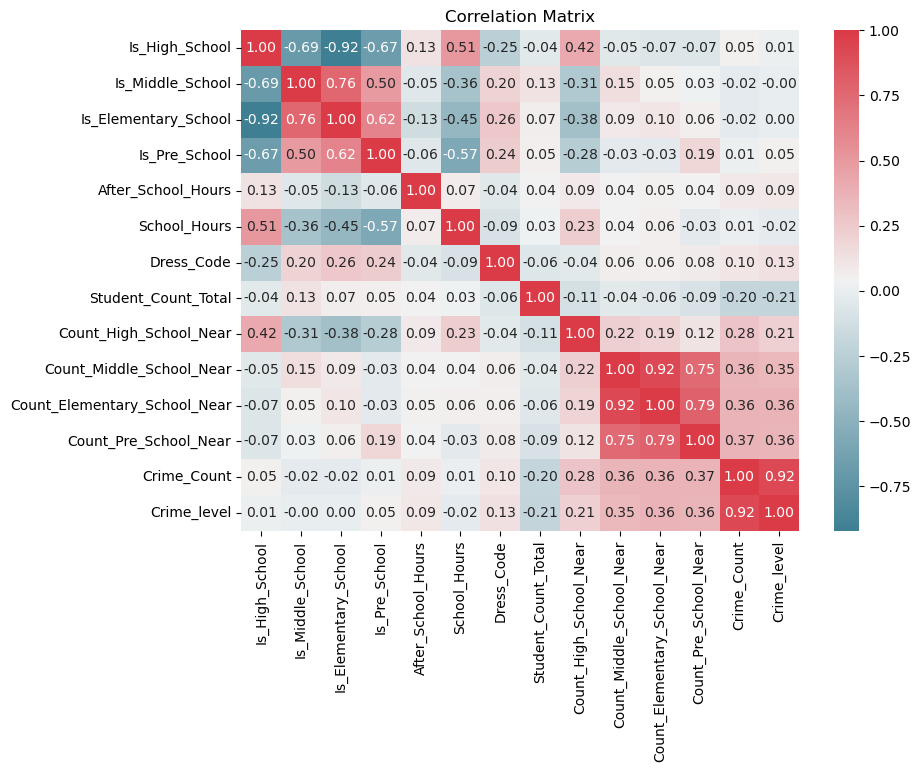

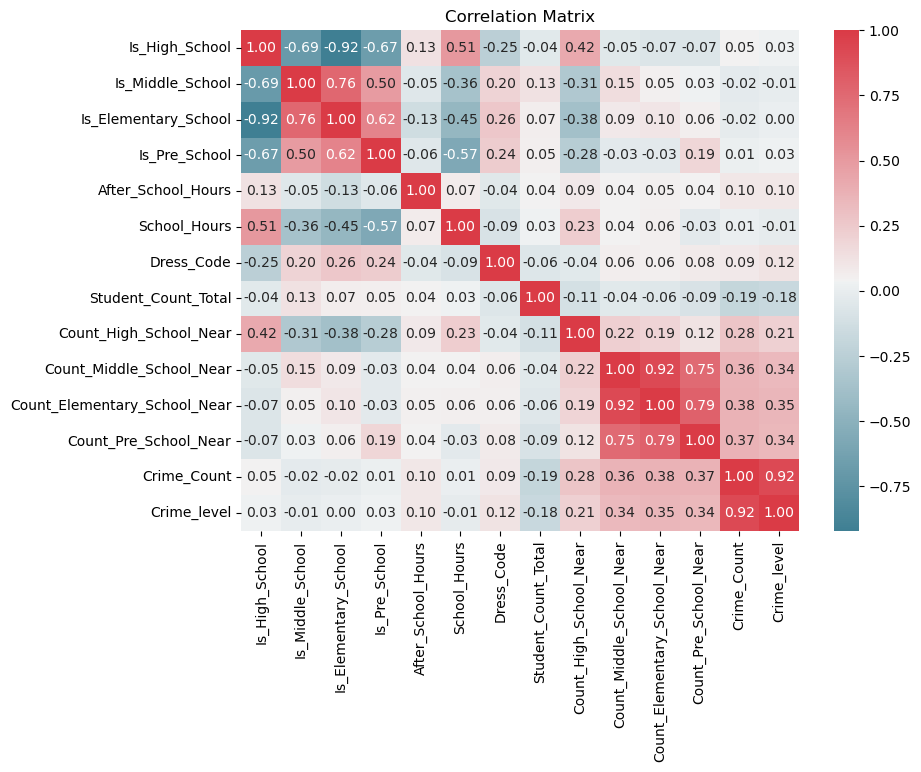

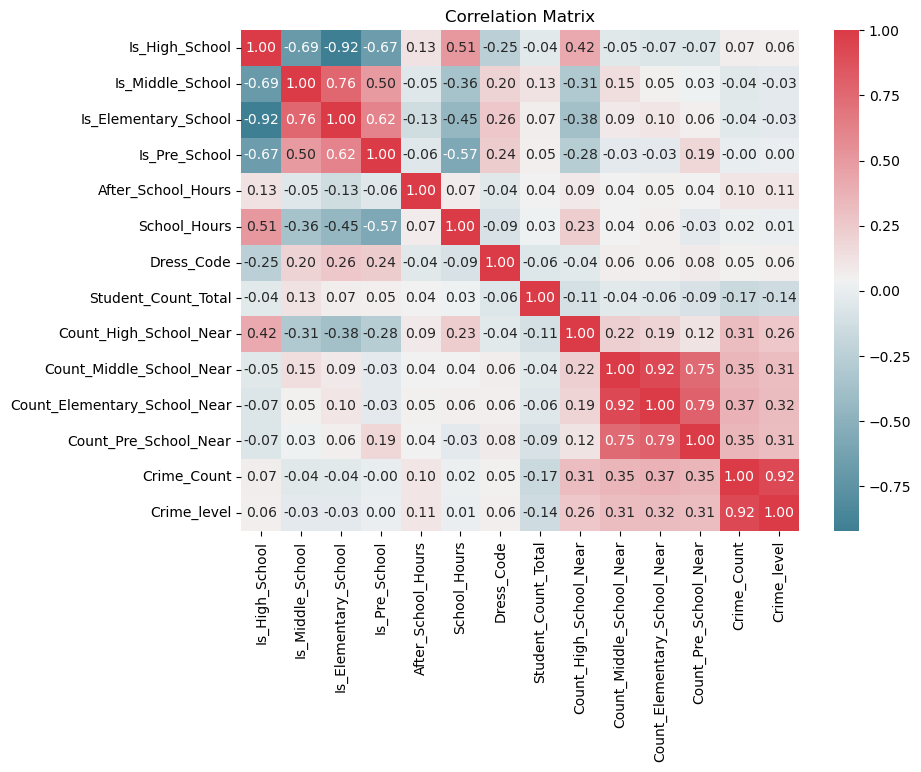

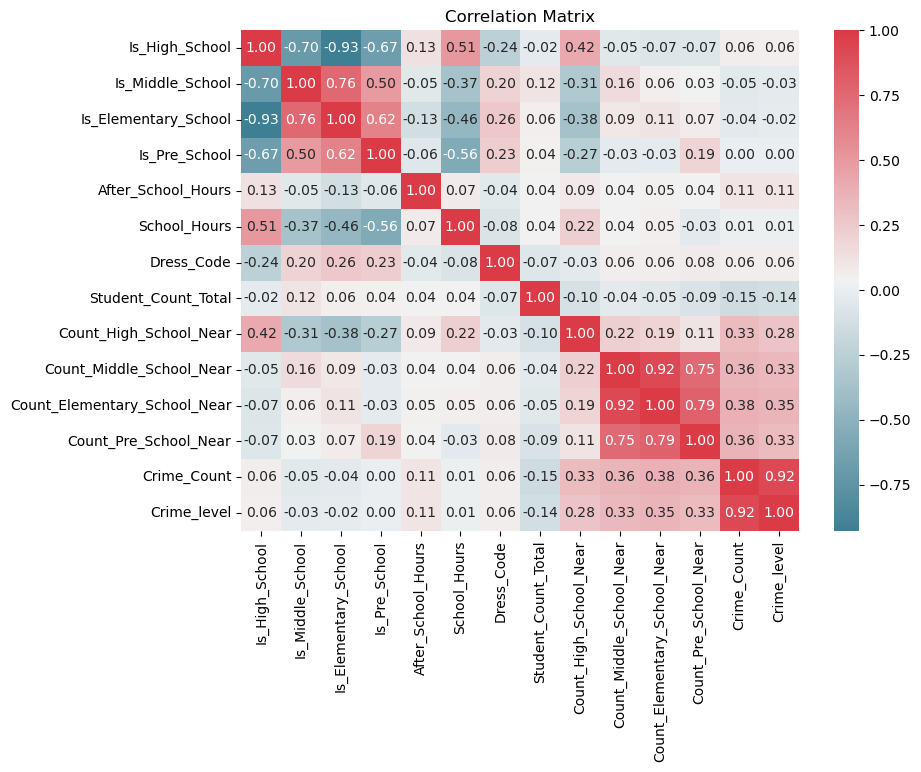

In [43]:
import seaborn as sns

def plot_corr(corr, title):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool_)
    mask[np.triu_indices_from(mask)] = False
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    plt.figure(figsize=(9, 6.5))
    plt.title(title)

    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")

# Supposons que school_crime_data est un dictionnaire contenant df1 à df6
for i in range(1, 8):
    current_df = school_crime_data[f'df{i}']
    
    # Calculer la matrice de corrélation
    corr = current_df.corr(method='spearman')
    
    # Afficher la matrice de corrélation avec le titre approprié
    plot_corr(corr, f'Correlation Matrix')

    plt.show()


(657, 14)
[2.77016743e-01 6.94063927e-01 7.39726027e-01 5.46423135e-01
 3.19756469e+01 4.37275495e+02 8.08219178e-01 5.60458143e+02
 1.11263318e+00 2.32420091e+00 2.48554033e+00 1.77777778e+00
 1.15950533e+03 9.93911720e-01] [2.00278467e-01 2.12339192e-01 1.92531432e-01 2.47844892e-01
 3.54657475e+03 7.66711013e+02 1.55000938e-01 1.59392300e+05
 1.13191042e+00 1.79900336e+00 2.00017144e+00 1.29308304e+00
 6.25231970e+05 5.02246038e-01]


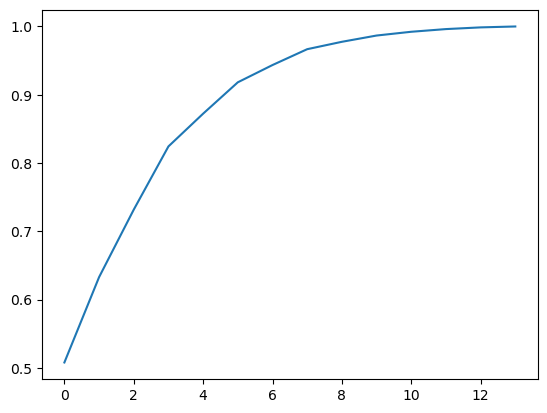

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


data_c =school_crime_data['df1'].dropna()
print(data_c.shape)
X = data_c.values     
std_scale = MinMaxScaler().fit(X)
X_scaled = std_scale.transform(X)

# check
print(np.mean(X, axis=0), np.var(X, axis=0))
np.mean(X_scaled, axis=0), np.var(X_scaled, axis=0)
pca = PCA().fit(X_scaled[:,:])
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Shape of df1 after dropping NaN values: (657, 14)
Means of df1: [2.77016743e-01 6.94063927e-01 7.39726027e-01 5.46423135e-01
 3.19756469e+01 4.37275495e+02 8.08219178e-01 5.60458143e+02
 1.11263318e+00 2.32420091e+00 2.48554033e+00 1.77777778e+00
 1.15950533e+03 9.93911720e-01]
Variances of df1: [2.00278467e-01 2.12339192e-01 1.92531432e-01 2.47844892e-01
 3.54657475e+03 7.66711013e+02 1.55000938e-01 1.59392300e+05
 1.13191042e+00 1.79900336e+00 2.00017144e+00 1.29308304e+00
 6.25231970e+05 5.02246038e-01]
********************************************************************************
Shape of df2 after dropping NaN values: (648, 14)
Means of df2: [2.70061728e-01 7.00617284e-01 7.48456790e-01 5.54012346e-01
 3.23040123e+01 4.36947531e+02 8.11728395e-01 5.65918210e+02
 1.09259259e+00 2.32098765e+00 2.48456790e+00 1.77777778e+00
 1.14861420e+03 9.98456790e-01]
Variances of df2: [1.97128391e-01 2.09752705e-01 1.88269223e-01 2.47082667e-01
 3.58024554e+03 7.62799716e+02 1.52825408e-01 1.5

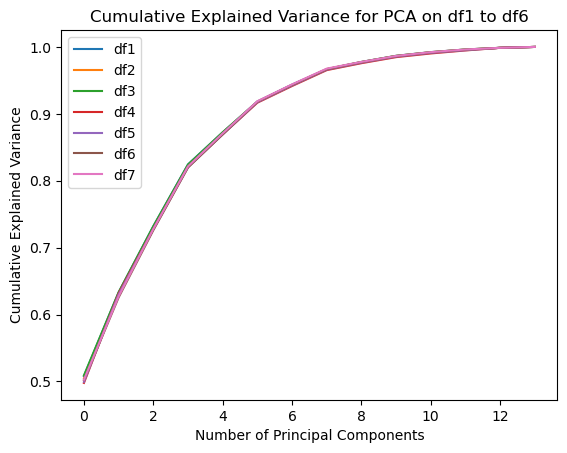

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

for i in range(1, 8):
    current_df = school_crime_data[f'df{i}']
    
    # Drop NaN values
    current_df_c = current_df.dropna()
    print(f"Shape of df{i} after dropping NaN values: {current_df_c.shape}")
    
    # Standardize the data
    X = current_df_c.values
    std_scale = MinMaxScaler().fit(X)
    X_scaled = std_scale.transform(X)

    # Check means and variances
    print(f"Means of df{i}: {np.mean(X, axis=0)}")
    print(f"Variances of df{i}: {np.var(X, axis=0)}")
    print('********************************************************************************')
    
    # Apply PCA
    pca = PCA().fit(X_scaled)
    
    # Plot cumulative explained variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_), label=f'df{i}')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for PCA on df1 to df6')
plt.legend()
plt.show()


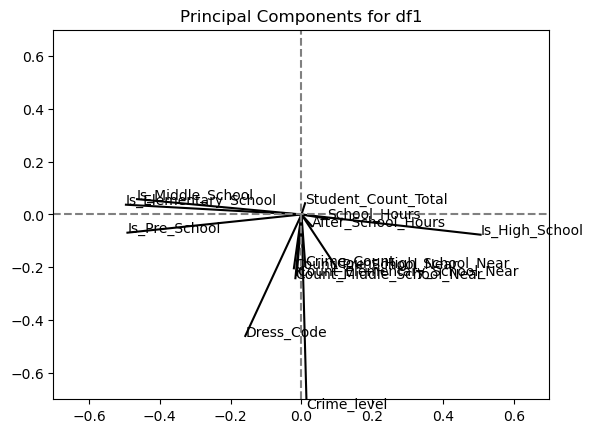

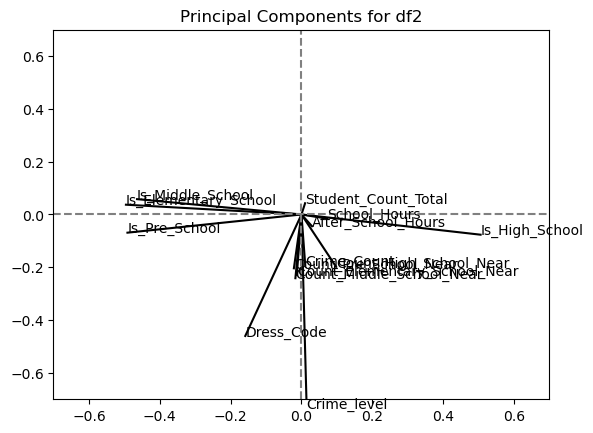

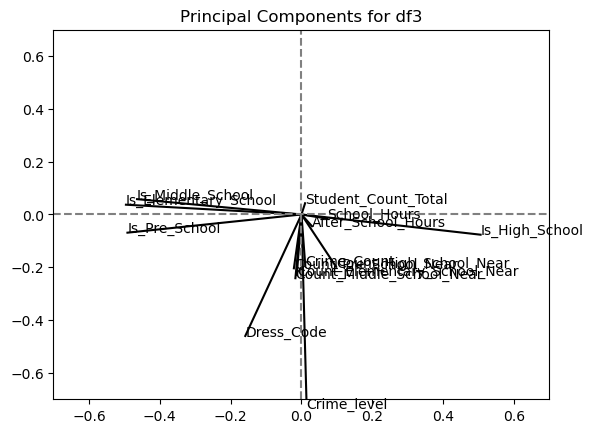

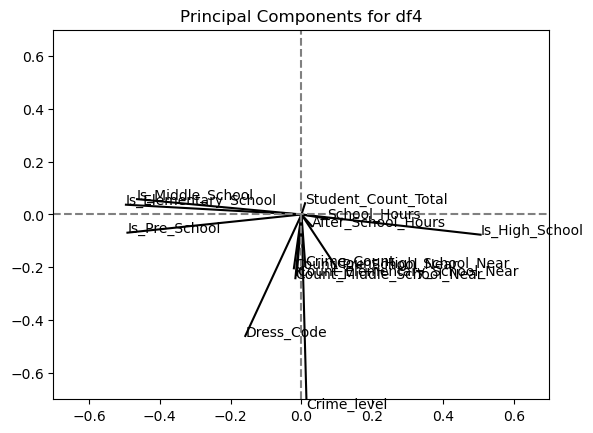

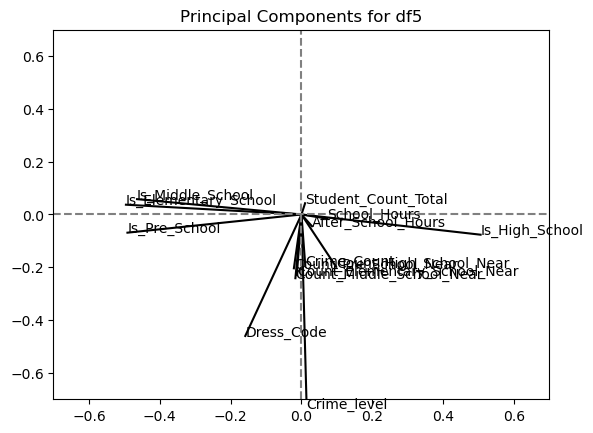

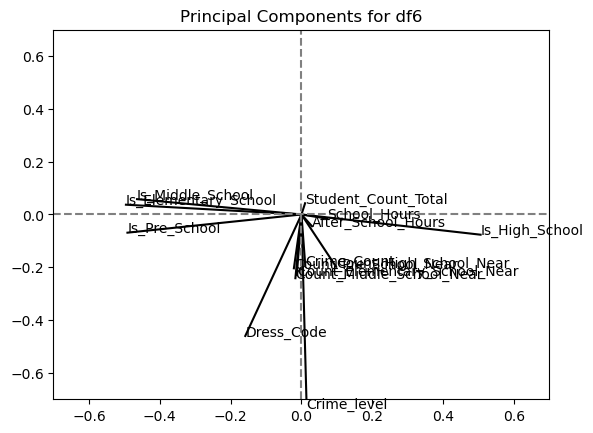

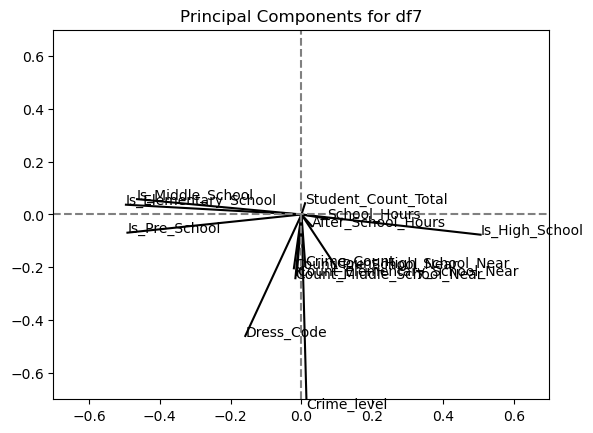

In [46]:
# n_components x n_features
for i in range(1, 8):
    components = pca.components_

    plt.figure()
    for j, (x, y) in enumerate(zip(components[0, :], components[1, :])):
        plt.plot([0, x], [0, y], color='k')
        plt.text(x, y, current_df_c.columns[j])

    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

    plt.xlim(-0.7, 0.7)
    plt.ylim(-0.7, 0.7)
    plt.title(f'Principal Components for df{i}')

plt.show()

In [47]:
school_crime_data['df1'].columns

Index(['Is_High_School', 'Is_Middle_School', 'Is_Elementary_School',
       'Is_Pre_School', 'After_School_Hours', 'School_Hours', 'Dress_Code',
       'Student_Count_Total', 'Count_High_School_Near',
       'Count_Middle_School_Near', 'Count_Elementary_School_Near',
       'Count_Pre_School_Near', 'Crime_Count', 'Crime_level'],
      dtype='object')

In [48]:
school_crime_data['df2'].shape

(648, 14)

In [49]:
school_crime_data['df2']

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0                 0                 0                     0              1   
1                 1                 0                     0              0   
2                 1                 1                     1              0   
3                 1                 0                     0              0   
4                 0                 1                     1              1   
..              ...               ...                   ...            ...   
656               0                 1                     1              1   
657               1                 0                     0              0   
658               1                 0                     0              0   
659               1                 1                     0              0   
660               0                 1                     1              0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                     0           360           0                  232   
1                     0           435           1                  900   
2                     0           425           0                   38   
3                     0           510           1                  341   
4                     0           480           1                  311   
..                  ...           ...         ...                  ...   
656                   0           420           1                  454   
657                   0           435           0                 1062   
658                   0           480           1                  494   
659                   0           435           1                 4447   
660                   0           450           1                  564   

     Count_High_School_Near  Count_Middle_School_Near  \
0                       1.0                       0.0   
1                       1.0                       1.0   
2                       3.0                       3.0   
3                       3.0                       1.0   
4                       0.0                       7.0   
..                      ...                       ...   
656                     1.0                       3.0   
657                     1.0                       1.0   
658                     3.0                       3.0   
659                     2.0                       2.0   
660                     1.0                       3.0   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  \
0                             0.0                    1.0         68.0   
1                             1.0                    0.0        457.0   
2                             3.0                    0.0        767.0   
3                             2.0                    1.0       1505.0   
4                             7.0                    4.0       2649.0   
..                            ...                    ...          ...   
656                           3.0                    2.0        623.0   
657                           1.0                    1.0        552.0   
658                           3.0                    3.0       1283.0   
659                           1.0                    0.0        372.0   
660                           3.0                    1.0        431.0   

    Crime_level  
0             0  
1             0  
2             1  
3             2  
4             2  
..          ...  
656           0  
657           0  
658           1  
659           0  
660           0  

[648 rows x 14 columns]

In [50]:
from sklearn.preprocessing import MinMaxScaler

df_names = [f"df{i}" for i in range(1, 8)]

# Creating an empty dictionary to store normalized DataFrames
normalized_dfs = {}

# Creating and normalizing DataFrames in a loop
for df_name in df_names:
    current_df = school_crime_data[df_name]
    
    # Scale the data
    scaler = MinMaxScaler()
    columns_to_normalize = current_df.select_dtypes(include=['number']).columns
    normalized_data = scaler.fit_transform(current_df[columns_to_normalize])
    normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)
    non_numeric_columns = current_df.select_dtypes(exclude=['number']).columns
    normalized_df[non_numeric_columns] = current_df[non_numeric_columns]
    
    # Store the normalized DataFrame in the dictionary
    normalized_dfs[df_name] = normalized_df

# Access the normalized DataFrames using normalized_dfs["df1"], normalized_dfs["df2"], ..., normalized_dfs["df6"]


In [51]:
normalized_dfs['df1']

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0               0.0               0.0                   0.0            1.0   
1               1.0               0.0                   0.0            0.0   
2               1.0               1.0                   1.0            0.0   
3               1.0               0.0                   0.0            0.0   
4               0.0               1.0                   1.0            1.0   
..              ...               ...                   ...            ...   
652             0.0               1.0                   1.0            1.0   
653             1.0               0.0                   0.0            0.0   
654             1.0               0.0                   0.0            0.0   
655             1.0               1.0                   0.0            0.0   
656             0.0               1.0                   1.0            0.0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                   0.0      0.000000         0.0             0.052170   
1                   0.0      0.357143         1.0             0.202384   
2                   0.0      0.309524         0.0             0.008545   
3                   0.0      0.714286         1.0             0.076681   
4                   0.0      0.571429         1.0             0.069935   
..                  ...           ...         ...                  ...   
652                 0.0      0.285714         1.0             0.102091   
653                 0.0      0.357143         0.0             0.238813   
654                 0.0      0.571429         1.0             0.111086   
655                 0.0      0.357143         1.0             1.000000   
656                 0.0      0.428571         1.0             0.126827   

     Count_High_School_Near  Count_Middle_School_Near  \
0                       0.2                  0.000000   
1                       0.2                  0.142857   
2                       0.6                  0.428571   
3                       0.6                  0.142857   
4                       0.0                  1.000000   
..                      ...                       ...   
652                     0.2                  0.428571   
653                     0.2                  0.142857   
654                     0.6                  0.428571   
655                     0.4                  0.285714   
656                     0.2                  0.428571   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  \
0                           0.000               0.142857     0.001102   
1                           0.125               0.000000     0.042243   
2                           0.375               0.000000     0.074446   
3                           0.250               0.142857     0.173748   
4                           0.875               0.571429     0.307702   
..                            ...                    ...          ...   
652                         0.375               0.285714     0.071752   
653                         0.125               0.142857     0.054120   
654                         0.375               0.428571     0.156973   
655                         0.125               0.000000     0.047998   
656                         0.375               0.142857     0.044570   

    Crime_level  
0             0  
1             0  
2             1  
3             1  
4             2  
..          ...  
652           1  
653           2  
654           1  
655           0  
656           0  

[657 rows x 14 columns]

# Models machine learning 

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

)
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_absolute_error,
    mean_absolute_error, classification_report, confusion_matrix, 
)
from sklearn.impute import SimpleImputer
from sklearn import svm
from xgboost import XGBRegressor

# Tests des différents algorithmes pour différentes régressions

Pour retenir les modèles les plus robustes, nous avons choisi de tester plusieurs algorithmes pour chaque Dataset (df1, df2, ..., df6). 

Choix du modèle pour faire la prédiction de l'impact des écoles sur les crimes une année après (données d'entrainement écoles 2016, crimes 2017)

# Application sur df1 : school 2016 - crime 2017

In [53]:
target_variable = 'Crime_Count'

# Separate features (X) and the target variable (y)
X = normalized_dfs['df1'].drop([target_variable, 'Crime_level'], axis=1) 
y = normalized_dfs['df1'][target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

df1 = []
df2 = []
df3 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
dfs = [df1, df2, df3, df4, df5, df6, df7]

# Random Forest Regressor 

In [54]:
models_RF = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Create a RandomForestRegressor
    RF_model_1 = RandomForestRegressor()

    # Fit the model on your training data
    RF_model_1.fit(X_train, y_train)

    # Get feature importances
    feature_importances = RF_model_1.feature_importances_

    # Create a DataFrame to display the feature importances
    feature_importance_df1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

    RFy_pred_1 = RF_model_1.predict(X_test)
    RF_mae_1 = mean_absolute_error(y_test, RFy_pred_1)
    RF_rmse_1 = np.sqrt(mean_absolute_error(y_test, RFy_pred_1))
    
    models_RF.append(RF_model_1)
    # Imprimir las métricas
    print(f'RF_MAE_{df}: {RF_mae_1:.4f}')
    print(f'RF_RMSE_{df}: {RF_rmse_1:.4f}')
    print('='*50)

    dfs[i].append(RF_mae_1)
    # Print or visualize the feature importances
    print("Feature Importances:")
    print(feature_importance_df1)

RF_MAE_df1: 0.0724
RF_RMSE_df1: 0.2691
Feature Importances:
                         Feature  Importance
7            Student_Count_Total    0.333486
11         Count_Pre_School_Near    0.123259
8         Count_High_School_Near    0.119594
5                   School_Hours    0.112524
9       Count_Middle_School_Near    0.084722
10  Count_Elementary_School_Near    0.074184
4             After_School_Hours    0.073414
3                  Is_Pre_School    0.031358
6                     Dress_Code    0.021716
1               Is_Middle_School    0.012197
0                 Is_High_School    0.008595
2           Is_Elementary_School    0.004951
RF_MAE_df2: 0.0666
RF_RMSE_df2: 0.2581
Feature Importances:
                         Feature  Importance
7            Student_Count_Total    0.380883
8         Count_High_School_Near    0.126017
11         Count_Pre_School_Near    0.100319
9       Count_Middle_School_Near    0.100317
10  Count_Elementary_School_Near    0.090844
4             After_Schoo

In [55]:
print(dfs)

[[0.07240595931149378], [0.06662081831919099], [0.06663266141658597], [0.11228388258021285], [0.10552729893072989], [0.07900627321758863], [0.07003629929702271]]


# SVM Regressor 

In [56]:
models_svm = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    svm_model_1 = svm.SVR(kernel='poly', C=1.0, epsilon=0.1, verbose=True)

    svm_model_1.fit(X_train, y_train)

    svmy_pred_1 = svm_model_1.predict(X_test)

    svm_mae_1 = mean_absolute_error(y_test, svmy_pred_1)
    svm_rmse_1 = np.sqrt(mean_absolute_error(y_test, svmy_pred_1))
    
    models_svm.append(svm_model_1)
    dfs[i].append(svm_mae_1)
    # Imprimir las métricas
    print(f'SVM_MAE_{df}: {svm_mae_1:.4f}')
    print(f'SVM_RMSE_{df}: {svm_rmse_1:.4f}')
    print('='*50)

[LibSVM]SVM_MAE_df1: 0.0772
SVM_RMSE_df1: 0.2779
[LibSVM]SVM_MAE_df2: 0.0736
SVM_RMSE_df2: 0.2712
[LibSVM]SVM_MAE_df3: 0.0737
SVM_RMSE_df3: 0.2715
[LibSVM]SVM_MAE_df4: 0.1075
SVM_RMSE_df4: 0.3279
[LibSVM]SVM_MAE_df5: 0.1014
SVM_RMSE_df5: 0.3185
[LibSVM]SVM_MAE_df6: 0.0817
SVM_RMSE_df6: 0.2858
[LibSVM]SVM_MAE_df7: 0.0787
SVM_RMSE_df7: 0.2804


# Gradient Boosting 

In [57]:
models_GBR = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Create a GradientBoostingRegressor
    GBR_model_1 = GradientBoostingRegressor()

    # Fit the model on your training data
    GBR_model_1.fit(X_train, y_train)

    # Get feature importances
    feature_importances = GBR_model_1.feature_importances_

    # Create a DataFrame to display the feature importances
    feature_importance_df_1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df_1 = feature_importance_df_1.sort_values(by='Importance', ascending=False)
    GBRy_pred_1 = GBR_model_1.predict(X_test)
    GBR_mae_1 = mean_absolute_error(y_test, GBRy_pred_1)
    GBR_rmse_1 = np.sqrt(mean_absolute_error(y_test, GBRy_pred_1))
    # Print or visualize the feature importances

    models_GBR.append(GBR_model_1)
    dfs[i].append(GBR_mae_1)
    # Imprimir las métricas
    print(f'GBR_MAE_{df}: {GBR_mae_1:.4f}')
    print(f'GBR_RMSE_{df}: {GBR_rmse_1:.4f}')
    print('='*50)

GBR_MAE_df1: 0.0684
GBR_RMSE_df1: 0.2616
GBR_MAE_df2: 0.0622
GBR_RMSE_df2: 0.2494
GBR_MAE_df3: 0.0636
GBR_RMSE_df3: 0.2523
GBR_MAE_df4: 0.1025
GBR_RMSE_df4: 0.3201
GBR_MAE_df5: 0.0922
GBR_RMSE_df5: 0.3037
GBR_MAE_df6: 0.0764
GBR_RMSE_df6: 0.2764
GBR_MAE_df7: 0.0682
GBR_RMSE_df7: 0.2612


# XGBoost

In [58]:
models_XGBR = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    # Create an XGBRegressor
    XGBR_model_1 = XGBRegressor()

    # Fit the model on your training data
    XGBR_model_1.fit(X_train, y_train)

    # Get feature importances
    feature_importances = XGBR_model_1.feature_importances_

    # Create a DataFrame to display the feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    XGBRy_pred_1 = XGBR_model_1.predict(X_test)
    
    XGBR_mae = mean_absolute_error(y_test, XGBRy_pred_1)
    XGBR_rmse = np.sqrt(mean_absolute_error(y_test, XGBRy_pred_1))
    # Print or visualize the feature importances

    models_XGBR.append(RF_model_1)
    dfs[i].append(XGBR_mae)
    # Imprimir las métricas
    print(f'XGBR_MAE_{df}: {XGBR_mae:.4f}')
    print(f'XGBR_RMSE_{df}: {XGBR_rmse:.4f}')
    print('='*50)

XGBR_MAE_df1: 0.0691
XGBR_RMSE_df1: 0.2629
XGBR_MAE_df2: 0.0695
XGBR_RMSE_df2: 0.2637
XGBR_MAE_df3: 0.0807
XGBR_RMSE_df3: 0.2841
XGBR_MAE_df4: 0.1223
XGBR_RMSE_df4: 0.3498
XGBR_MAE_df5: 0.1090
XGBR_RMSE_df5: 0.3301
XGBR_MAE_df6: 0.0877
XGBR_RMSE_df6: 0.2961
XGBR_MAE_df7: 0.0710
XGBR_RMSE_df7: 0.2665


# AdaBoost Regressor

In [59]:
models_AdaBoost = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Create an AdaBoostRegressor
    AdaBoost_model_1 = AdaBoostRegressor()

    # Fit the model on your training data
    AdaBoost_model_1.fit(X_train, y_train)

    # Get feature importances (if applicable for the base estimator, not all base estimators support feature_importances_)
    try:
        feature_importances = AdaBoost_model_1.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        # print("Feature Importances:")
        # print(feature_importance_df)
    except AttributeError:
        print("Feature importances are not available for the base estimator in AdaBoost.")

    # Make predictions on the test set
    AdaBoost_y_pred_1 = AdaBoost_model_1.predict(X_test)

    AdaBoost_mae_1 = mean_absolute_error(y_test, AdaBoost_y_pred_1)
    AdaBoost_rmse_1 = np.sqrt(mean_absolute_error(y_test, AdaBoost_y_pred_1))

    # Calculate Mean Squared Error
    models_AdaBoost.append(AdaBoost_model_1)

    dfs[i].append(AdaBoost_mae_1)
    # Imprimir las métricas
    print(f'AdaBoost_MAE_{df}: {AdaBoost_mae_1:.4f}')
    print(f'AdaBoost_RMSE_{df}: {AdaBoost_rmse_1:.4f}')
    print('='*50)

AdaBoost_MAE_df1: 0.0670
AdaBoost_RMSE_df1: 0.2588
AdaBoost_MAE_df2: 0.0861
AdaBoost_RMSE_df2: 0.2935
AdaBoost_MAE_df3: 0.0689
AdaBoost_RMSE_df3: 0.2624
AdaBoost_MAE_df4: 0.1283
AdaBoost_RMSE_df4: 0.3581
AdaBoost_MAE_df5: 0.1316
AdaBoost_RMSE_df5: 0.3628
AdaBoost_MAE_df6: 0.0900
AdaBoost_RMSE_df6: 0.3000
AdaBoost_MAE_df7: 0.0823
AdaBoost_RMSE_df7: 0.2869


# SGDRegressor 

In [60]:
models_SGDR = []
for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = normalized_dfs[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = normalized_dfs[df][target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # Create an SGDRegressor
    SGDR_model_1 = SGDRegressor(max_iter=1000, random_state=42)

    # Fit the model on your training data
    SGDR_model_1.fit(X_train, y_train)

    # Print the coefficients with feature names, sorted by absolute value in descending order
    coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': SGDR_model_1.coef_})
    coef_df['AbsoluteCoefficient'] = coef_df['Coefficient'].abs()  # Add a column for absolute values
    coef_df = coef_df.sort_values(by='AbsoluteCoefficient', ascending=False)

    # Evaluate the model on the test set
    SGDRy_pred_1 = SGDR_model_1.predict(X_test)
    SGDR_mae_1 = mean_absolute_error(y_test, SGDRy_pred_1)
    SGDR_rmse_1 = np.sqrt(mean_absolute_error(y_test, SGDRy_pred_1))

    models_SGDR.append(SGDR_model_1)

    dfs[i].append(SGDR_mae_1)
    # Print or visualize the feature importances
    print(f'SGDR_MAE_{df}: {SGDR_mae_1:.4f}')
    print(f'SGDR_RMSE_{df}: {SGDR_rmse_1:.4f}')
    print('='*50)
    # # Print or visualize the sorted coefficients
    # print("Sorted Coefficients:")
    # print(coef_df[['Feature', 'Coefficient']])

SGDR_MAE_df1: 0.0688
SGDR_RMSE_df1: 0.2624
SGDR_MAE_df2: 0.0641
SGDR_RMSE_df2: 0.2533
SGDR_MAE_df3: 0.0625
SGDR_RMSE_df3: 0.2500
SGDR_MAE_df4: 0.1059
SGDR_RMSE_df4: 0.3254
SGDR_MAE_df5: 0.0999
SGDR_RMSE_df5: 0.3161
SGDR_MAE_df6: 0.0778
SGDR_RMSE_df6: 0.2790
SGDR_MAE_df7: 0.0686
SGDR_RMSE_df7: 0.2619


In [61]:
print(dfs)

[[0.07240595931149378, 0.07720958079349546, 0.06841290482867379, 0.06914033759798179, 0.06698532597989236, 0.06883162294108844], [0.06662081831919099, 0.07357303320932605, 0.062210107684046015, 0.0695313909831665, 0.08614988279638862, 0.06414552134916156], [0.06663266141658597, 0.07371431311005155, 0.06363256269908281, 0.0807086375973665, 0.06887326410642834, 0.06250010565930209], [0.11228388258021285, 0.10752869737361061, 0.10248378279705429, 0.12234241235402558, 0.12826851656207305, 0.1059115562247706], [0.10552729893072989, 0.10141811131395136, 0.09223527758517974, 0.10895091018477342, 0.13163061522961614, 0.09993874017110788], [0.07900627321758863, 0.08168283923341393, 0.07640969610883891, 0.08767156372525735, 0.08999486430906486, 0.07784598565529421], [0.07003629929702271, 0.07865147330172893, 0.06822105169951616, 0.0710395546163527, 0.08229626530414487, 0.0686113018421689]]


In [62]:
data_res = {
    '1_year_after': dfs[0],
    '2_years_after': dfs[1],
    '3_years_after': dfs[2],
    '4_years_after': dfs[3],
    '5_years_after': dfs[4],
    '6_years_after': dfs[5],
    '7_years_after': dfs[6]
}

index = ['RF', 'SVM', 'GBR', 'XGBR', 'AdaB', 'SGDR']
df_res = pd.DataFrame(data_res, index=index)

In [63]:
df_res_ = df_res.transpose()


In [64]:
df_res_

RF       SVM       GBR      XGBR      AdaB      SGDR
1_year_after   0.072406  0.077210  0.068413  0.069140  0.066985  0.068832
2_years_after  0.066621  0.073573  0.062210  0.069531  0.086150  0.064146
3_years_after  0.066633  0.073714  0.063633  0.080709  0.068873  0.062500
4_years_after  0.112284  0.107529  0.102484  0.122342  0.128269  0.105912
5_years_after  0.105527  0.101418  0.092235  0.108951  0.131631  0.099939
6_years_after  0.079006  0.081683  0.076410  0.087672  0.089995  0.077846
7_years_after  0.070036  0.078651  0.068221  0.071040  0.082296  0.068611

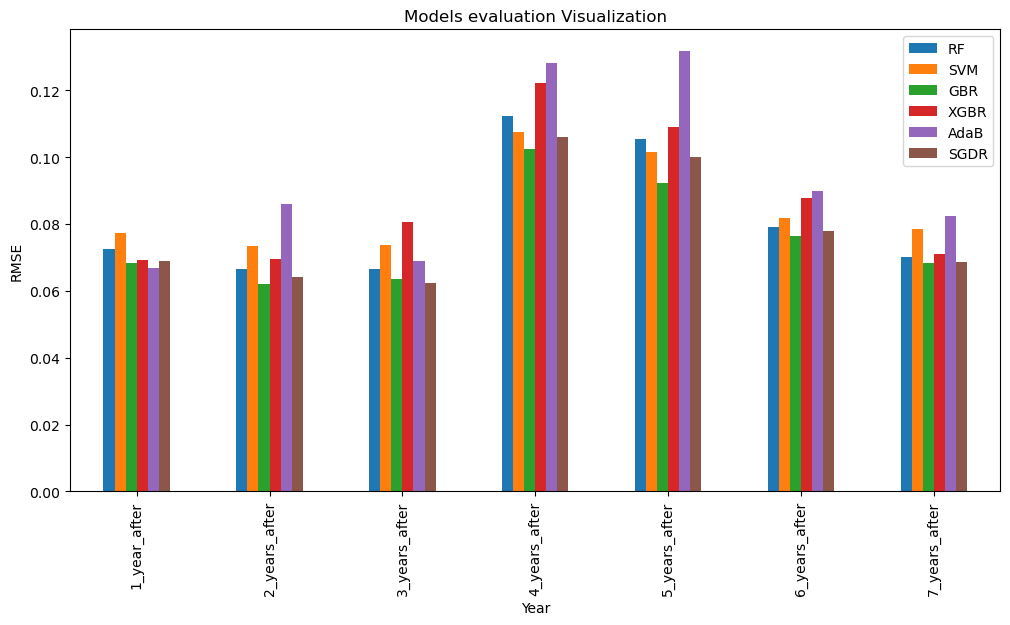

In [65]:
df_res_.plot(kind='bar', figsize=(12, 6))
plt.title('Models evaluation Visualization')
plt.xlabel('Year')
plt.ylabel('RMSE')
plt.show()

# Création d'une nouvelle école 

In [66]:
import folium
from folium.plugins import MarkerCluster

In [67]:
# new school data
new_school = [{'School_Latitude': 41.858374,
    'School_Longitude': -87.668724,
    'Is_High_School': 1, 'Is_Middle_School': 0, 'Is_Elementary_School': 0, 'Is_Pre_School': 0,
              'After_School_Hours': 60, 'School_Hours': 470, 'Dress_Code': 1, 'Student_Count_Total': 550}]

# create a new dataFrame
df_new_school = pd.DataFrame(new_school)

# Créer une géoDataFrame à partir du DataFrame de la nouvelle école
geometry = [Point(xy) for xy in zip(df_new_school['School_Longitude'], df_new_school['School_Latitude'])]
gdf_new_school = gpd.GeoDataFrame(df_new_school, geometry=geometry, crs='EPSG:4326')

# Convertir les coordonnées en UTM
gdf_new_school = gdf_new_school.to_crs(epsg=32633)  # UTM zone 33N

# Calculer le nombre de crimes autour de la nouvelle école
gdf_new_school['Crime_Count'] = gdf_new_school.apply(lambda x: count_crimes_around_school(x, crimes), axis=1)

# Si l'année est inférieure à 2023, calculer également le nombre de crimes de l'année suivante
if year < 2023:
    gdf_new_school['Crime_Count_Next_Year'] = gdf_new_school.apply(lambda x: count_crimes_around_school_next(x, crimes_next), axis=1)

# Calculer le nombre d'autres types d'écoles autour de la nouvelle école
school_types_counts_new_school = gdf_new_school.apply(lambda x: count_school_types_around_school(x, schools), axis=1)

# Ajouter les comptages au DataFrame de la nouvelle école
df_new_school['Count_High_School_Near'] = school_types_counts_new_school['Is_High_School']
df_new_school['Count_Middle_School_Near'] = school_types_counts_new_school['Is_Middle_School']
df_new_school['Count_Elementary_School_Near'] = school_types_counts_new_school['Is_Elementary_School']
df_new_school['Count_Pre_School_Near'] = school_types_counts_new_school['Is_Pre_School']


[126, 207, 549, 312, 438]


In [68]:
df_new_school

School_Latitude  School_Longitude  Is_High_School  Is_Middle_School  \
0        41.858374        -87.668724               1                 0   

   Is_Elementary_School  Is_Pre_School  After_School_Hours  School_Hours  \
0                     0              0                  60           470   

   Dress_Code  Student_Count_Total  Count_High_School_Near  \
0           1                  550                       1   

   Count_Middle_School_Near  Count_Elementary_School_Near  \
0                         5                             5   

   Count_Pre_School_Near  
0                      3

In [69]:
# Add the new school to the 2023 dataframe
data_prediction = pd.concat([school_crime_data['df7'], df_new_school], axis=0, ignore_index=True)

In [70]:
data_prediction = data_prediction.drop(['School_Longitude', 'School_Latitude'], axis=1)
data_prediction

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0                 0                 0                     0              1   
1                 1                 0                     0              0   
2                 1                 1                     1              0   
3                 1                 0                     0              0   
4                 0                 1                     1              1   
..              ...               ...                   ...            ...   
637               1                 0                     0              0   
638               1                 0                     0              0   
639               1                 1                     0              0   
640               0                 1                     1              0   
641               1                 0                     0              0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                     0           360           0                  232   
1                     0           435           1                  900   
2                     0           425           0                   38   
3                     0           510           1                  341   
4                     0           480           1                  311   
..                  ...           ...         ...                  ...   
637                   0           435           0                 1062   
638                   0           480           1                  494   
639                   0           435           1                 4447   
640                   0           450           1                  564   
641                  60           470           1                  550   

     Count_High_School_Near  Count_Middle_School_Near  \
0                       1.0                       0.0   
1                       1.0                       1.0   
2                       3.0                       3.0   
3                       3.0                       1.0   
4                       0.0                       7.0   
..                      ...                       ...   
637                     1.0                       1.0   
638                     3.0                       3.0   
639                     2.0                       2.0   
640                     1.0                       3.0   
641                     1.0                       5.0   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  \
0                             0.0                    1.0         64.0   
1                             1.0                    0.0        324.0   
2                             3.0                    0.0        644.0   
3                             2.0                    1.0       1303.0   
4                             7.0                    4.0       1744.0   
..                            ...                    ...          ...   
637                           1.0                    1.0        380.0   
638                           3.0                    3.0        878.0   
639                           1.0                    0.0        281.0   
640                           3.0                    1.0        445.0   
641                           5.0                    3.0          NaN   

    Crime_level  
0             0  
1             0  
2             1  
3             2  
4             2  
..          ...  
637           0  
638           1  
639           0  
640           0  
641         NaN  

[642 rows x 14 columns]

In [71]:
# Normalize the dataset 2023 with the school
data_2023 = data_prediction.drop(['Crime_level', 'Crime_Count'], axis=1)
columns_to_normalize = data_2023.select_dtypes(include=['number']).columns

data_2023 = scaler.fit_transform(data_2023[columns_to_normalize])
print(data_2023[0])

[0.         0.         0.         1.         0.         0.
 0.         0.05131668 0.2        0.         0.         0.14285714]


In [72]:
best_models = []
best_models.extend([models_GBR[0], models_GBR[1], models_SGDR[2], models_GBR[3], models_GBR[4], models_GBR[5], models_SGDR[6]])

In [73]:
print(best_models)

[GradientBoostingRegressor(), GradientBoostingRegressor(), SGDRegressor(random_state=42), GradientBoostingRegressor(), GradientBoostingRegressor(), GradientBoostingRegressor(), SGDRegressor(random_state=42)]


In [74]:
X_max = data_prediction['Crime_Count'].max()
X_min = data_prediction['Crime_Count'].min()

In [75]:
for i, model in enumerate(best_models):
    pred = model.predict(data_2023)
    valeur_dénormalisée = (pred * (X_max - X_min) + X_min).astype(int)
    data_prediction[f'{i+2024}'] = valeur_dénormalisée

d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRe

In [76]:
for i, model in enumerate(best_models):
    pred = model.predict(data_2023[-1:])
    valeur_dénormalisée = (pred * (X_max - X_min) + X_min).astype(int)
    print(valeur_dénormalisée)

[892]
[944]
[811]
[1697]
[1658]
[1221]
[1111]


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRe

In [77]:
data_prediction

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0                 0                 0                     0              1   
1                 1                 0                     0              0   
2                 1                 1                     1              0   
3                 1                 0                     0              0   
4                 0                 1                     1              1   
..              ...               ...                   ...            ...   
637               1                 0                     0              0   
638               1                 0                     0              0   
639               1                 1                     0              0   
640               0                 1                     1              0   
641               1                 0                     0              0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                     0           360           0                  232   
1                     0           435           1                  900   
2                     0           425           0                   38   
3                     0           510           1                  341   
4                     0           480           1                  311   
..                  ...           ...         ...                  ...   
637                   0           435           0                 1062   
638                   0           480           1                  494   
639                   0           435           1                 4447   
640                   0           450           1                  564   
641                  60           470           1                  550   

     Count_High_School_Near  Count_Middle_School_Near  ...  \
0                       1.0                       0.0  ...   
1                       1.0                       1.0  ...   
2                       3.0                       3.0  ...   
3                       3.0                       1.0  ...   
4                       0.0                       7.0  ...   
..                      ...                       ...  ...   
637                     1.0                       1.0  ...   
638                     3.0                       3.0  ...   
639                     2.0                       2.0  ...   
640                     1.0                       3.0  ...   
641                     1.0                       5.0  ...   

     Count_Pre_School_Near  Crime_Count  Crime_level  2024  2025  2026  2027  \
0                      1.0         64.0            0    88    77   328   305   
1                      0.0        324.0            0   314   374   595   567   
2                      0.0        644.0            1   830   834   689  1436   
3                      1.0       1303.0            2   529   743   708  1245   
4                      4.0       1744.0            2  1508  1306   823  2895   
..                     ...          ...          ...   ...   ...   ...   ...   
637                    1.0        380.0            0   369   468   505   691   
638                    3.0        878.0            1   856   777   788  1511   
639                    0.0        281.0            0   361   309   662   557   
640                    1.0        445.0            0   561   515   611   979   
641                    3.0          NaN          NaN   892   944   811  1697   

     2028  2029  2030  
0     234   195   456  
1     541   540   822  
2    1369  1260   985  
3     983   923   989  
4    2352  1757  1100  
..    ...   ...   ...  
637   688   668   731  
638  1405  1159  1086  
639   503   386   918  
640  1010   860   822  
641  1658  1221  1111  

[642 rows x 21 columns]

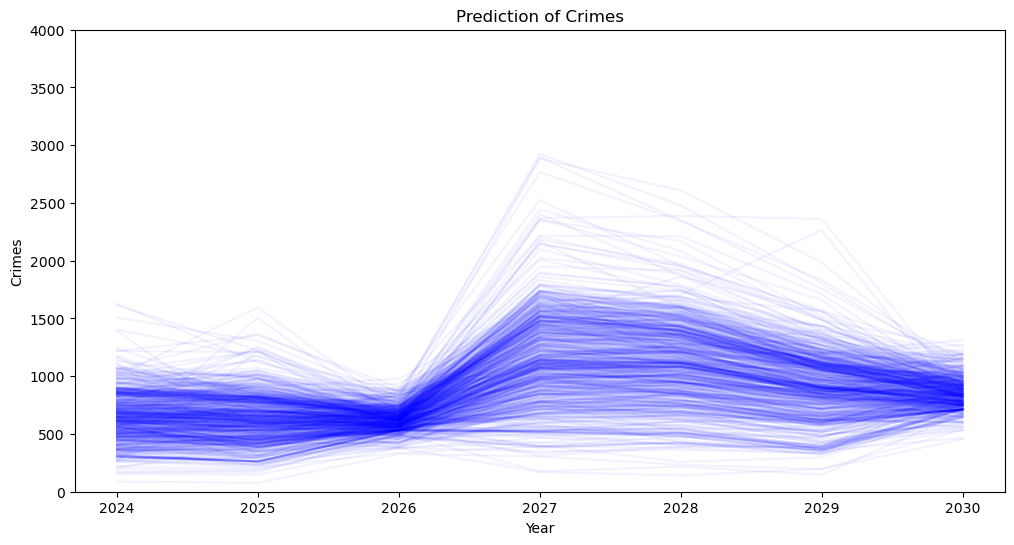

In [78]:
selected_columns = ['2024', '2025', '2026', '2027', '2028', '2029', '2030']
data_prediction_ = data_prediction[data_prediction['2024']<3000]

data_prediction_[selected_columns].T.plot(kind='line', linestyle='-', legend=None, color='b', alpha=0.05, figsize=(12, 6))

plt.title('Prediction of Crimes')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.ylim(0, 4000)
plt.show()

In [79]:
year = 2022

df_crimes_year = df_crimes[df_crimes['Year']==year].dropna(subset=['Longitude'])
df_schools = df_new_school

schools_geometry = [Point(xy) for xy in zip(df_schools['School_Longitude'], df_schools['School_Latitude'])]
schools = gpd.GeoDataFrame(df_schools, geometry=schools_geometry)

crimes_geometry = [Point(xy) for xy in zip(df_crimes_year['Longitude'], df_crimes_year['Latitude'])]
crimes = gpd.GeoDataFrame(df_crimes_year, geometry=crimes_geometry)

# use meter
schools.crs = 'EPSG:4326'  # WGS84
crimes.crs = 'EPSG:4326'  # WGS84
schools = schools.to_crs(epsg=32633)  # UTM zone 33N
crimes = crimes.to_crs(epsg=32633)  # UTM zone 33N

crime_spatial_index = crimes.sindex
school_spatial_index = schools.sindex

# count crimes
def count_crimes_around_school(school, crimes, radius=radius):
    possible_matches_index = list(crime_spatial_index.intersection(school.geometry.buffer(radius).bounds))
    possible_matches = crimes.iloc[possible_matches_index]
    return len(possible_matches)

df_new_school['Crime_Count'] = schools.apply(lambda x: count_crimes_around_school(x, crimes), axis=1)
df_new_school

School_Latitude  School_Longitude  Is_High_School  Is_Middle_School  \
0        41.858374        -87.668724               1                 0   

   Is_Elementary_School  Is_Pre_School  After_School_Hours  School_Hours  \
0                     0              0                  60           470   

   Dress_Code  Student_Count_Total  Count_High_School_Near  \
0           1                  550                       1   

   Count_Middle_School_Near  Count_Elementary_School_Near  \
0                         5                             5   

   Count_Pre_School_Near  Crime_Count  
0                      3         1017

In [80]:
data_prediction

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
0                 0                 0                     0              1   
1                 1                 0                     0              0   
2                 1                 1                     1              0   
3                 1                 0                     0              0   
4                 0                 1                     1              1   
..              ...               ...                   ...            ...   
637               1                 0                     0              0   
638               1                 0                     0              0   
639               1                 1                     0              0   
640               0                 1                     1              0   
641               1                 0                     0              0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
0                     0           360           0                  232   
1                     0           435           1                  900   
2                     0           425           0                   38   
3                     0           510           1                  341   
4                     0           480           1                  311   
..                  ...           ...         ...                  ...   
637                   0           435           0                 1062   
638                   0           480           1                  494   
639                   0           435           1                 4447   
640                   0           450           1                  564   
641                  60           470           1                  550   

     Count_High_School_Near  Count_Middle_School_Near  ...  \
0                       1.0                       0.0  ...   
1                       1.0                       1.0  ...   
2                       3.0                       3.0  ...   
3                       3.0                       1.0  ...   
4                       0.0                       7.0  ...   
..                      ...                       ...  ...   
637                     1.0                       1.0  ...   
638                     3.0                       3.0  ...   
639                     2.0                       2.0  ...   
640                     1.0                       3.0  ...   
641                     1.0                       5.0  ...   

     Count_Pre_School_Near  Crime_Count  Crime_level  2024  2025  2026  2027  \
0                      1.0         64.0            0    88    77   328   305   
1                      0.0        324.0            0   314   374   595   567   
2                      0.0        644.0            1   830   834   689  1436   
3                      1.0       1303.0            2   529   743   708  1245   
4                      4.0       1744.0            2  1508  1306   823  2895   
..                     ...          ...          ...   ...   ...   ...   ...   
637                    1.0        380.0            0   369   468   505   691   
638                    3.0        878.0            1   856   777   788  1511   
639                    0.0        281.0            0   361   309   662   557   
640                    1.0        445.0            0   561   515   611   979   
641                    3.0          NaN          NaN   892   944   811  1697   

     2028  2029  2030  
0     234   195   456  
1     541   540   822  
2    1369  1260   985  
3     983   923   989  
4    2352  1757  1100  
..    ...   ...   ...  
637   688   668   731  
638  1405  1159  1086  
639   503   386   918  
640  1010   860   822  
641  1658  1221  1111  

[642 rows x 21 columns]

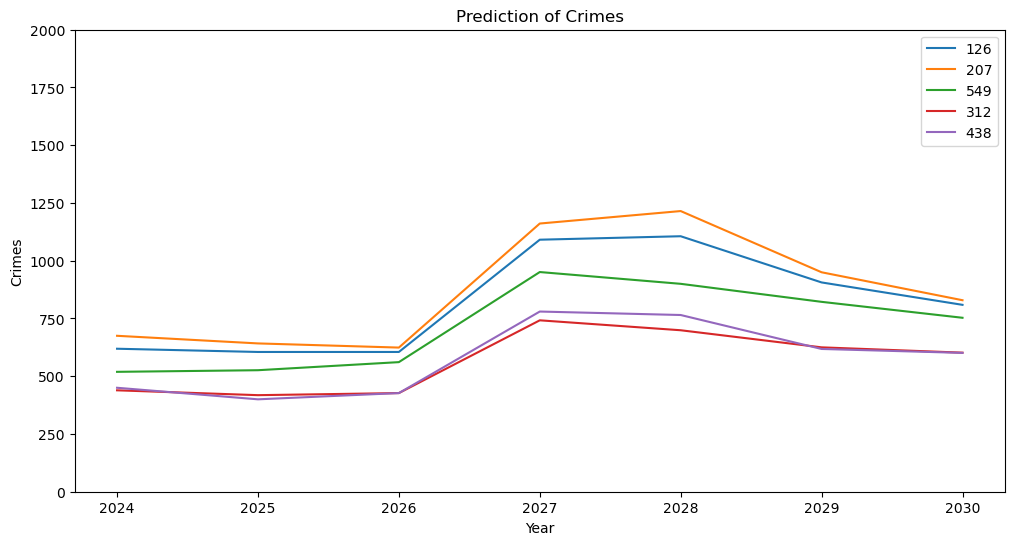

In [81]:
selected_columns = ['2024', '2025', '2026', '2027', '2028', '2029', '2030']
data_prediction_inf = data_prediction
school_influence = data_prediction_inf[selected_columns].loc[[126, 207, 549, 312 , 438]]

school_influence.T.plot(kind='line', linestyle='-',label='Crimes 2022', figsize=(12, 6))

plt.title('Prediction of Crimes')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.ylim(0, 2000)
plt.show()

In [82]:
data_prediction = pd.concat([school_crime_data['df7'], df_new_school], axis=0, ignore_index=True)
data_prediction = data_prediction.drop(['School_Longitude', 'School_Latitude'], axis=1)
school_i = data_prediction.iloc[[126, 207, 549, 312, 438]]
school_i

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
126               0                 1                     1              0   
207               0                 1                     1              1   
549               0                 1                     1              1   
312               0                 1                     1              1   
438               0                 1                     1              1   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
126                   0           465           1                  451   
207                   0           420           1                  379   
549                   0           420           1                  536   
312                   0           420           0                  758   
438                   0           420           0                  463   

     Count_High_School_Near  Count_Middle_School_Near  \
126                     0.0                       3.0   
207                     0.0                       3.0   
549                     1.0                       1.0   
312                     0.0                       1.0   
438                     0.0                       1.0   

     Count_Elementary_School_Near  Count_Pre_School_Near  Crime_Count  \
126                           3.0                    2.0       1366.0   
207                           3.0                    2.0        360.0   
549                           1.0                    1.0        607.0   
312                           1.0                    1.0        635.0   
438                           1.0                    1.0       1189.0   

    Crime_level  
126           2  
207           0  
549           1  
312           1  
438           2

In [83]:
school_i['Count_Elementary_School_Near'] = school_i['Count_Elementary_School_Near'].apply(lambda x: x - 1)
data_2023_ = school_i.drop(['Crime_level', 'Crime_Count',], axis=1)
data_2023_

C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2582341030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_i['Count_Elementary_School_Near'] = school_i['Count_Elementary_School_Near'].apply(lambda x: x - 1)


Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
126               0                 1                     1              0   
207               0                 1                     1              1   
549               0                 1                     1              1   
312               0                 1                     1              1   
438               0                 1                     1              1   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
126                   0           465           1                  451   
207                   0           420           1                  379   
549                   0           420           1                  536   
312                   0           420           0                  758   
438                   0           420           0                  463   

     Count_High_School_Near  Count_Middle_School_Near  \
126                     0.0                       3.0   
207                     0.0                       3.0   
549                     1.0                       1.0   
312                     0.0                       1.0   
438                     0.0                       1.0   

     Count_Elementary_School_Near  Count_Pre_School_Near  
126                           2.0                    2.0  
207                           2.0                    2.0  
549                           0.0                    1.0  
312                           0.0                    1.0  
438                           0.0                    1.0

In [84]:
df_d = data_prediction.drop(['Crime_level', 'Crime_Count'], axis=1)
normalized_pre = (data_2023_-df_d.min())/(df_d.max()-df_d.min())
normalized_pre

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
126             0.0               1.0                   1.0            0.0   
207             0.0               1.0                   1.0            1.0   
549             0.0               1.0                   1.0            1.0   
312             0.0               1.0                   1.0            1.0   
438             0.0               1.0                   1.0            1.0   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
126                 0.0      0.500000         1.0             0.100608   
207                 0.0      0.285714         1.0             0.084402   
549                 0.0      0.285714         1.0             0.119739   
312                 0.0      0.285714         0.0             0.169705   
438                 0.0      0.285714         0.0             0.103309   

     Count_High_School_Near  Count_Middle_School_Near  \
126                     0.0                  0.428571   
207                     0.0                  0.428571   
549                     0.2                  0.142857   
312                     0.0                  0.142857   
438                     0.0                  0.142857   

     Count_Elementary_School_Near  Count_Pre_School_Near  
126                          0.25               0.285714  
207                          0.25               0.285714  
549                          0.00               0.142857  
312                          0.00               0.142857  
438                          0.00               0.142857

In [85]:
for i, model in enumerate(best_models):
    pred = model.predict(normalized_pre)
    valeur_dénormalisée = (pred * (X_max - X_min) + X_min).astype(int)
    school_i[f'{i+2024}'] = valeur_dénormalisée

C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2362096248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_i[f'{i+2024}'] = valeur_dénormalisée
C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2362096248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_i[f'{i+2024}'] = valeur_dénormalisée
C:\Users\Antony\AppData\Local\Temp\ipykernel_1532\2362096248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [86]:
school_i

Is_High_School  Is_Middle_School  Is_Elementary_School  Is_Pre_School  \
126               0                 1                     1              0   
207               0                 1                     1              1   
549               0                 1                     1              1   
312               0                 1                     1              1   
438               0                 1                     1              1   

     After_School_Hours  School_Hours  Dress_Code  Student_Count_Total  \
126                   0           465           1                  451   
207                   0           420           1                  379   
549                   0           420           1                  536   
312                   0           420           0                  758   
438                   0           420           0                  463   

     Count_High_School_Near  Count_Middle_School_Near  ...  \
126                     0.0                       3.0  ...   
207                     0.0                       3.0  ...   
549                     1.0                       1.0  ...   
312                     0.0                       1.0  ...   
438                     0.0                       1.0  ...   

     Count_Pre_School_Near  Crime_Count  Crime_level 2024  2025  2026  2027  \
126                    2.0       1366.0            2  619   610   588  1091   
207                    2.0        360.0            0  670   647   607  1161   
549                    1.0        607.0            1  589   582   544  1250   
312                    1.0        635.0            1  509   646   410  1132   
438                    1.0       1189.0            2  520   318   410   755   

     2028  2029  2030  
126  1106   906   786  
207  1215   950   806  
549  1182   822   730  
312   917   871   579  
438   702   618   578  

[5 rows x 21 columns]

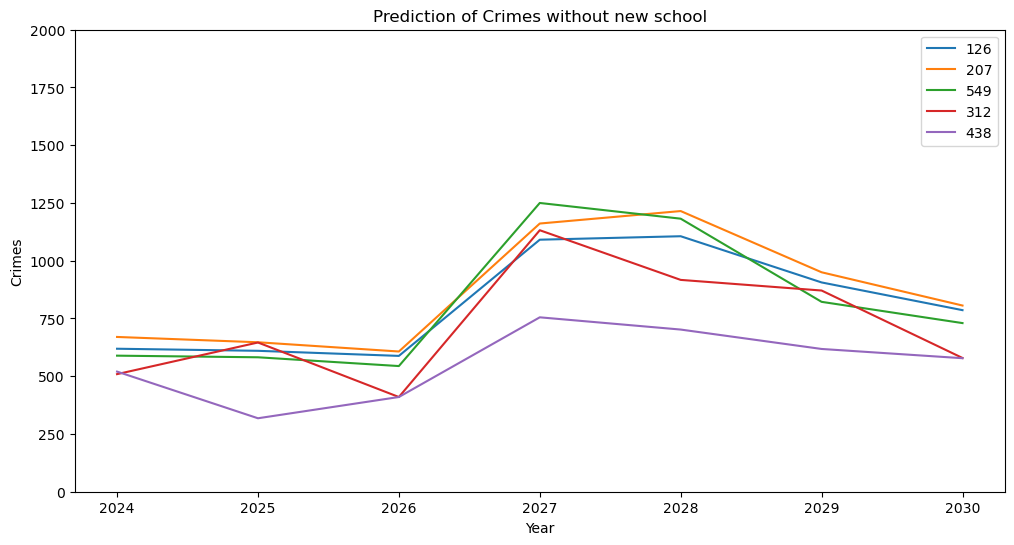

In [87]:
selected_columns = ['2024', '2025', '2026', '2027', '2028', '2029', '2030']
data_prediction_ = school_i

data_prediction_[selected_columns].T.plot(kind='line', linestyle='-', figsize=(12, 6))

plt.title('Prediction of Crimes without new school')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.ylim(0, 2000)
plt.show()

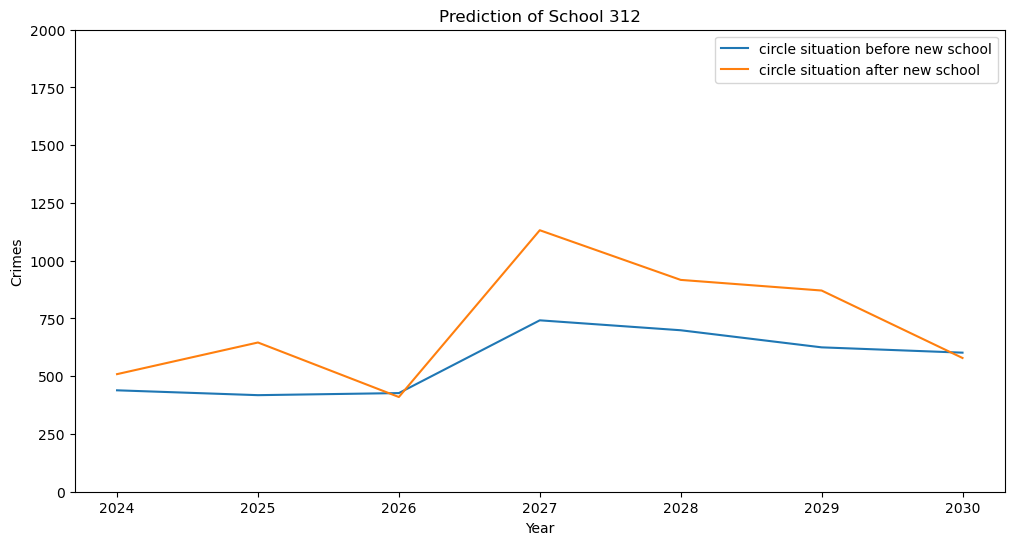

In [88]:
series1 = school_influence.iloc[3]
series1.name = 'circle situation before new school'
series2 = data_prediction_[selected_columns].iloc[3]
series2.name = 'circle situation after new school'
combined_series = pd.concat([series1, series2], axis=1)
combined_series.plot(kind='line', linestyle='-', figsize=(12, 6))

plt.title('Prediction of School 312')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.ylim(0, 2000)
plt.show()

In [89]:
((series2-series1)/series1)

2024    0.159453
2025    0.545455
2026   -0.039813
2027    0.525606
2028    0.311874
2029    0.393600
2030   -0.038206
dtype: float64

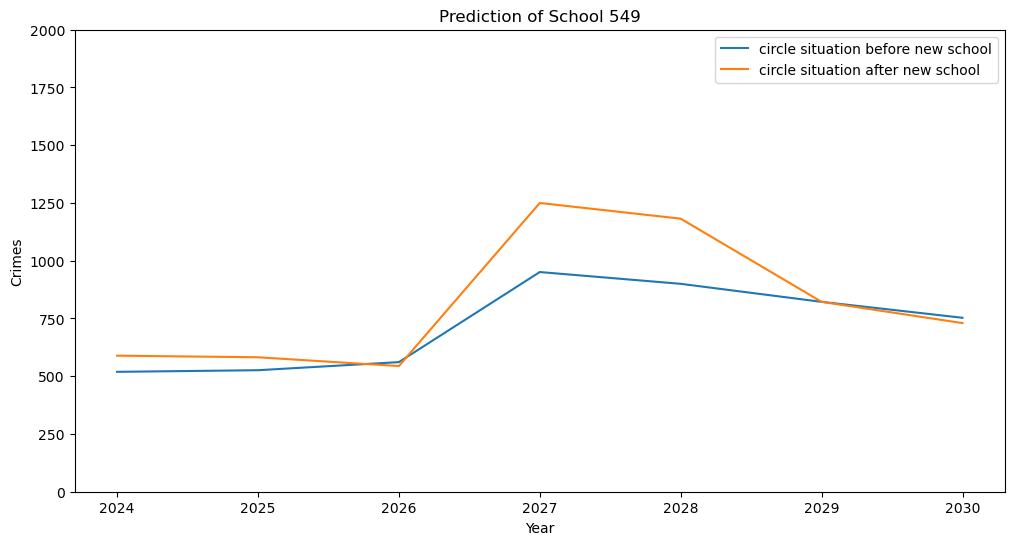

In [90]:
series1 = school_influence.iloc[2]
series1.name = 'circle situation before new school'
series2 = data_prediction_[selected_columns].iloc[2]
series2.name = 'circle situation after new school'
combined_series = pd.concat([series1, series2], axis=1)
combined_series.plot(kind='line', linestyle='-', figsize=(12, 6))

plt.title('Prediction of School 549')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.ylim(0, 2000)
plt.show()

In [91]:
((series2-series1)/series1)

2024    0.134875
2025    0.106464
2026   -0.030303
2027    0.314406
2028    0.313333
2029    0.000000
2030   -0.030544
dtype: float64

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

all_data = normalized_dfs

for i, df in enumerate(normalized_dfs):
    # Separate features (X) and the target variable (y)
    X = all_data[df].drop([target_variable, 'Crime_level'], axis=1) 
    y = all_data[df][target_variable]

    model = best_models[i]

    # K-fold cross-validation
    k_fold = KFold(n_splits=15, shuffle=True, random_state=42)

    # Evaluate the model, use RMSE
    rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
    cross_val_results_rmse = cross_val_score(model, X, y, cv=k_fold, scoring=rmse_scorer)

    # Evaluate the model, use MAE
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    cross_val_results_mae = cross_val_score(model, X, y, cv=k_fold, scoring=mae_scorer)

    # Output the results
    print(f'Cross validation df{i+1}')
    print(f'Model used: {model}')
    print(f'Average RMSE: {-1*cross_val_results_rmse.mean():.4f}')
    print(f'Average MAE: {-1*cross_val_results_mae.mean():.4f}')
    print('='*50)
    print()

Cross validation df1
Model used: GradientBoostingRegressor()
Average RMSE: 0.0900
Average MAE: 0.0615

Cross validation df2
Model used: GradientBoostingRegressor()
Average RMSE: 0.0877
Average MAE: 0.0593

Cross validation df3
Model used: SGDRegressor(random_state=42)
Average RMSE: 0.0896
Average MAE: 0.0646

Cross validation df4
Model used: GradientBoostingRegressor()
Average RMSE: 0.1475
Average MAE: 0.1084

Cross validation df5
Model used: GradientBoostingRegressor()
Average RMSE: 0.1354
Average MAE: 0.1000

Cross validation df6
Model used: GradientBoostingRegressor()
Average RMSE: 0.1116
Average MAE: 0.0796

Cross validation df7
Model used: SGDRegressor(random_state=42)
Average RMSE: 0.0994
Average MAE: 0.0756



Awl 7aja n9d ndir hya n runi les modèles dyali 3la la base 2023 bach nchouf l prédicition des crimes sur 2024 2025 2026 2027 2028 2029
3ad mn b3d n supposi zdt école, o nchouf ach ghaytra 